<h1> Анализ базы вакансий HH.ru</h1>

<strong> Описание: </strong>
    
Исследование базы вакансий на hh.ru для Аналитиков данных и Дата сайентистов.

<strong> Цель проекта: </strong>

Выявить различия в предлагаемых вакансиях для Аналитиков данных и специалистов по Data Science.

<strong> План работы: </strong>

1. Предобработка данных.
2. Исследовательский анализ данных.
   - Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
   - Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils.
   - Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы.
   - Расчет понедельной динамики количества вакансий для Аналитика данных и специалиста по Data Science.
3. Выводы.
4. Презентации.

<strong> Описание данных: </strong>

Для анализа предоставлены два датасета, анализируемый период с 29.02.2024 по 30.04.2024 гг.:

1) vacancies_da (2).xlsx - вакансии аналитиков данных
2) vacancies_ds.xlsx - вакансии Data Scientist

Представлены столбцы:

- id - уникальный номер вакансии
- name - название вакансии
- published_at - дата публикации вакансии
- alternate_url - ссылка на вакансию
- type - тип вакансии
- employer - работодатель
- department - департамент
- area - город
- experience - опыт работы
- key_skills - ключевые скиллы
- schedule - график работы
- employment - тип занятости
- description - описание вакансии
- description_lemmatized - описание вакансии лемматизация
- salary_from - зарплата от
- salary_to - зарплата до
- salary_bin - зарплатная вилка 
- key_skills_from_key_skills_field - ключевые скиллы
- hard_skills_from_description - хард скиллы
- soft_skills_from_description - софт скиллы

## Предобработка данных

In [1574]:
# импортируем библиотеки
import pandas as pd
import warnings
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import sys
import numpy
import requests

warnings.filterwarnings("ignore", "use_inf_as_na")
sns.set_theme(style="whitegrid", palette="pastel")

In [1575]:
# посмотрим на данные по вакансиям аналитиков и переведем столбец "дата публикации вакансии" в формат даты
da = pd.read_excel('vacancies_da (2).xlsx', parse_dates=['published_at'])
da.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
262,97431803,Senior data analyst,2024-04-19 13:54:25,https://hh.ru/vacancy/97431803,Открытая,Звук,NaN,Москва,Middle (3-6 years),"['SQL', 'Python']",Полный день,Полная занятость,в отделе аналитики запускается новое направлен...,отдел аналитика запускаться новый направление ...,NaN,NaN,ЗП не указана,"Python, SQL",NaN,NaN
133,95416072,Financial Data Analyst,2024-04-24 23:44:11,https://hh.ru/vacancy/95416072,Открытая,Новартис Фарма,NaN,Москва,Junior+ (1-3 years),"['Принятие решений', 'Юнит-экономика']",Полный день,Полная занятость,"your responsibilities include, but are not lim...",your responsibilities include but are not limi...,NaN,NaN,ЗП не указана,NaN,Юнит-экономика,Принятие решений
273,97647605,Data Analyst,2024-04-22 17:26:07,https://hh.ru/vacancy/97647605,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,сбер в поиске аналитика данных на проект по по...,сбер поиск аналитика данные проект построение ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
238,97093414,Аналитик SQL / Data Analyst,2024-04-16 10:34:26,https://hh.ru/vacancy/97093414,Открытая,WILDBERRIES,NaN,Москва,Middle (3-6 years),"['Анализ данных', 'Big Data', 'data analyst', ...",Удаленная работа,Полная занятость,"wildberries развивает масштабную финансовую, л...",wildberries развивать масштабный финансовый ло...,NaN,NaN,ЗП не указана,"SQL, Анализ данных, data analyst, Big Data, Po...",NaN,NaN
114,95061919,Аналитик данных / Data analyst,2024-04-15 14:16:09,https://hh.ru/vacancy/95061919,Открытая,FISH FINDER,NaN,Москва,Junior+ (1-3 years),"['Анализ ассортиментной линейки', 'Аналитическ...",Полный день,Полная занятость,"мы - прогрессивно развивающаяся компания, боле...",прогрессивный развивающийся компания 3 х год у...,80000.00,120000.00,От 100 тысяч до 200 тысяч,"Аналитическое мышление, Аналитика, Анализ данн...",NaN,NaN


In [1576]:
# посмотрим на данные по вакансиям дата сайентистов и переведем столбец "дата публикации вакансии" в формат даты
ds = pd.read_excel('vacancies_ds.xlsx', parse_dates=['published_at'])
ds.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
346,95532126,Data Scientist (Pricing),2024-04-25 12:37:59,https://hh.ru/vacancy/95532126,Открытая,Lamoda Tech,NaN,Москва,Middle (3-6 years),"['Machine Learning', 'Pricing', 'Python', 'Big...",Гибкий график,Полная занятость,мы в поиске data scientist в команду pricing. ...,поиск data scientist команда pricing предстоят...,NaN,NaN,ЗП не указана,"Python, Big Data, Machine Learning, Pricing",NaN,NaN
336,95482532,Junior Data Scientist в SberData,2024-03-25 23:52:00,https://hh.ru/vacancy/95482532,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,в команду «sberdata» блока технологии сбербанк...,команда sberdata блок технология сбербанк иска...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
174,94514625,Senior Data Scientist (Fintech),2024-04-01 12:05:25,https://hh.ru/vacancy/94514625,Открытая,Netex24,NaN,Москва,Middle (3-6 years),"['Data Scientist', 'Коммуникация', 'FinTech']",Полный день,Полная занятость,data scientist приглашаем специалиста data sci...,data scientist приглашать специалист data scie...,250000.00,350000.00,Больше 300 тысяч,"FinTech, Data Scientist",NaN,Коммуникация
413,95979309,Data Scientist,2024-04-02 12:07:51,https://hh.ru/vacancy/95979309,Открытая,ИЦ АЙ-ТЕКО,NaN,Москва,Junior+ (1-3 years),[],Удаленная работа,Полная занятость,компания «ай-теко»- ведущий российский системн...,компания ай теко ведущий российский системный ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
621,97790561,Data Scientist,2024-04-24 09:55:58,https://hh.ru/vacancy/97790561,Открытая,Ростелеком,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Pandas', 'Git', 'Python'...",Удаленная работа,Полная занятость,"привет, будущий заклинатель данных! хочешь при...",привет будущий заклинатель данные хотеть присо...,NaN,NaN,ЗП не указана,"Python, Big Data, SQL, Machine Learning, Git",Pandas,NaN


Можем заметить, что в некоторых вакансиях не указаны ключевые скиллы требуемые в работе.

In [1577]:
# обьединим два датасета, чтобы в дальнейшем было удобнее в них работать
vacancies_da_ds = pd.concat([da.assign(name_type='da'), ds.assign(name_type='ds')], ignore_index=True)
start_data_size = vacancies_da_ds.shape[0]

In [1578]:
vacancies_da_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                972 non-null    int64         
 1   name                              972 non-null    object        
 2   published_at                      972 non-null    datetime64[ns]
 3   alternate_url                     972 non-null    object        
 4   type                              972 non-null    object        
 5   employer                          972 non-null    object        
 6   department                        362 non-null    object        
 7   area                              972 non-null    object        
 8   experience                        972 non-null    object        
 9   key_skills                        972 non-null    object        
 10  schedule                          972 non-null    

Типы данных в столбцах - указаны верно. Можем заметить, что не всегда указывается департамент и заработная плата в вакансиях. 

In [1579]:
# посмотрим датасет на дубликаты, сравнив группы аналитиков и сайентистов 
# (так как есть смежные вакансии и непонятно к какой группе их можно отнести)

grid = (vacancies_da_ds.name.str.lower().str.contains(r'data scien')
    & ((vacancies_da_ds.name.str.lower().str.contains(r'analyst')
    | vacancies_da_ds.name.str.lower().str.contains(r'аналитик данных'))) 
    & (~vacancies_da_ds.name.str.lower().str.contains(r'видеоаналитика')))
vacancies_da_ds[grid].sort_values(by='id')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type
377,92068025,"Аналитик данных (data scientist, data engineer)",2024-03-12 12:42:01,https://hh.ru/vacancy/92068025,Открытая,Федеральное государственное автономное учрежде...,NaN,Москва,Middle (3-6 years),"['Документация', 'Создание моделей', 'Оформлен...",...,Полная занятость,в настоящее время фгау «нии «цэпп» расширяет к...,настоящий время фгау нии цэпп расширять команд...,100000.00,NaN,ЗП не указана,"Python, Системы автоматического контроля, Созд...",NaN,Документация,ds
477,94499131,Аналитик данных (Data Scientist),2024-03-11 10:06:45,https://hh.ru/vacancy/94499131,Открытая,УГМК-Телеком,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],...,Полная занятость,в группу компаний угмк-телеком приглашаем на р...,группа компания угмк телеком приглашать работа...,50000.00,70000.00,Меньше 100 тысяч,NaN,NaN,Аналитическое мышление,ds
478,94499132,Аналитик данных (Data Scientist),2024-03-11 10:06:45,https://hh.ru/vacancy/94499132,Открытая,УГМК-Телеком,NaN,Верхняя Пышма,Junior+ (1-3 years),['Аналитическое мышление'],...,Полная занятость,в группу компаний угмк-телеком приглашаем на р...,группа компания угмк телеком приглашать работа...,50000.00,70000.00,Меньше 100 тысяч,NaN,NaN,Аналитическое мышление,ds
529,94749035,Аналитик данных / Data Scientist,2024-04-01 11:17:22,https://hh.ru/vacancy/94749035,Открытая,RedCat,NaN,Москва,Junior+ (1-3 years),"['Pandas', 'Selenium IDE', 'OpenAI', 'Python',...",...,Полная занятость,наш продукт - независимая платформа для b2b в ...,наш продукт независимый платформа b2b содружес...,NaN,NaN,ЗП не указана,"SQL, Python, PostgreSQL, Pandas, Numpy, OpenAI...",Pandas,NaN,ds
537,94768696,Data Scientist in Geoscience (Аналитик данных ...,2024-04-01 14:56:46,https://hh.ru/vacancy/94768696,Открытая,Aramco Innovations,NaN,Москва,Senior (6+ years),"['Machine Learning', 'Английский язык', 'Data ...",...,Полная занятость,aramco research center – moscow is offering gr...,aramco research center moscow is offering grea...,NaN,NaN,ЗП не указана,"Python, Machine Learning, Английский язык, Dat...",Юнит-экономика,"Коммуникация, Документация, Презентация резуль...",ds
93,94814473,Data scientist/Data Analyst,2024-03-15 11:29:22,https://hh.ru/vacancy/94814473,Открытая,Градиентех,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'SciPy', 'Python', 'Numpy...",...,Частичная занятость,о нас: мы it компания по развитию искусственно...,it компания развитие искусственный интеллект а...,NaN,NaN,ЗП не указана,"Python, Machine Learning, SciPy, PyTorch, Nump...",NaN,NaN,da
546,94814473,Data scientist/Data Analyst,2024-03-15 11:29:22,https://hh.ru/vacancy/94814473,Открытая,Градиентех,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'SciPy', 'Python', 'Numpy...",...,Частичная занятость,о нас: мы it компания по развитию искусственно...,it компания развитие искусственный интеллект а...,NaN,NaN,ЗП не указана,"Python, Machine Learning, SciPy, PyTorch, Nump...",NaN,NaN,ds
556,94856037,"Data Scientist/Analyst ""Платформа эксперименто...",2024-04-10 17:16:44,https://hh.ru/vacancy/94856037,Открытая,Okko,NaN,Москва,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",...,Полная занятость,a/b эксперименты – ключевой инструмент для при...,a b эксперимент ключевой инструмент принятие р...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN,ds
108,94956753,Data Analyst / Data Scientist (Junior/Junior+),2024-03-18 13:12:03,https://hh.ru/vacancy/94956753,Открытая,Kept (Кэпт),NaN,Москва,Junior+ (1-3 years),"['Pandas', 'Data Analysis', 'Git', 'Python', '...",...,Полная занятость,мы в поиске талантливого кандидата на вакансию...,поиск талантливый кандидат вакансия data analy...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика, Git, D...",P

Из таблицы выше видно, что есть повторяющиеся вакансии и они попадают в обе выборке.
Посмотрим, сколько таких смежных вакансий:

In [1580]:
print(vacancies_da_ds[grid].shape[0])

44


In [1581]:
# удалим такие вакансии
vacancies_da_ds = vacancies_da_ds[~grid].sort_values(by='id')

# и посмотрим, сколько осталось
print(round((1 - (vacancies_da_ds.shape[0] / start_data_size)) * 100, 2))

4.53


In [1582]:
# создадим новую переменную "дата публикации вакансии"
vacancies_da_ds['published_date'] = vacancies_da_ds.published_at.dt.date

In [1583]:
# посмотрим, есть ли дубликаты по id
dupl_id = vacancies_da_ds.duplicated(subset='id').sum()
print(dupl_id)

6


In [1584]:
# посмотрим, что это за дубликаты
duplicated = vacancies_da_ds.duplicated(subset='id')
duplicates = vacancies_da_ds[duplicated]
duplicates

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date
17,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da,2024-04-04
18,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da,2024-03-28
56,93551149,Дата аналитик (Data Scientist),2024-03-19 05:41:39,https://hh.ru/vacancy/93551149,Открытая,Центр финансовых технологий,NaN,Казань,Junior+ (1-3 years),['Pandas'],...,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da,2024-03-19
456,94241749,Дата аналитик (Data Scientist),2024-03-28 06:25:15,https://hh.ru/vacancy/94241749,Открытая,Центр финансовых технологий,NaN,Томск,Junior+ (1-3 years),['Pandas'],...,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds,2024-03-28
459,94257136,Дата аналитик (Data Scientist),2024-03-28 06:25:25,https://hh.ru/vacancy/94257136,Открытая,Центр финансовых технологий,NaN,Екатеринбург,Junior+ (1-3 years),['Pandas'],...,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds,2024-03-28
675,95663230,Дата аналитик (Data Scientist),2024-03-28 06:28:18,https://hh.ru/vacancy/95663230,Открытая,Центр финансовых технологий,NaN,Москва,Middle (3-6 years),['Pandas'],...,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds,2024-03-28


In [1585]:
# id разный, ссылки тоже, не будем трогать эти дубликаты

In [1586]:
# посмотрим, есть ли неявные дубликаты
vacancies_da_ds[vacancies_da_ds.duplicated(
        subset=['name', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date
86,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da,2024-03-13
95,94827220,Data Analyst,2024-03-15 13:54:00,https://hh.ru/vacancy/94827220,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),['Креативность'],...,мы команда аналитического управления центра ко...,команда аналитический управление центр комплае...,NaN,NaN,ЗП не указана,NaN,NaN,Креативность,da,2024-03-15
62,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da,2024-03-27
269,97587281,Data Analyst,2024-04-22 09:00:00,https://hh.ru/vacancy/97587281,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),['Креативность'],...,мы команда аналитического управления центра ко...,команда аналитический управление центр комплае...,NaN,NaN,ЗП не указана,NaN,NaN,Креативность,da,2024-04-22
276,97741410,Data Analyst,2024-04-23 16:32:21,https://hh.ru/vacancy/97741410,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da,2024-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,96727424,Специалист по Data Science,2024-04-11 15:21:38,https://hh.ru/vacancy/96727424,Открытая,БАНК УРАЛСИБ,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,чем предстоит заниматься принимать участие в...,предстоять заниматься принимать участие весь э...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds,2024-04-11
455,94235433,Эконометрист (junior data scientist),2024-03-05 01:51:46,https://hh.ru/vacancy/94235433,Открытая,Аналитический центр при Правительстве Российск...,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Эконометрика', 'Python',...",...,задачи: разработка алгоритмов предварительног...,задача разработка алгоритм предварительный ана...,NaN,NaN,ЗП не указана,"Python, Статистический анализ, SQL, Математиче...",NaN,NaN,ds,2024-03-05
745,96175298,Эконометрист (junior data scientist),2024-04-04 12:33:52,https://hh.ru/vacancy/96175298,Открытая,Аналитический центр при Правительстве Российск...,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Эконометрика', 'Python',...",...,задачи: разработка алгоритмов предварительног...,задача разработка алгоритм предварительный ана...,NaN,NaN,ЗП не указана,"Python, Статистический анализ, SQL, Математиче...",NaN,NaN,ds,2024-04-04
669,95613788,Эконометрист / Data scientist,2024-03-27 13:03:38,https://hh.ru/vacancy/95613788,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds,2024-03-27


In [1587]:
# неявные дубликаты есть, уберем их
vacancies_da_ds.drop_duplicates(
    subset=['name', 'employer', 'department', 'area', 'description'],
    keep=False, inplace=True
)
# посмотрим сколько удалили данных
print(round((1 - (vacancies_da_ds.shape[0] / start_data_size)) * 100, 2))

20.16


In [1588]:
# проанализируем наши данные на аномальные значения
# посмотрим на название вакансий
vacancies_da_ds.name.value_counts()[:10]

name
Data Scientist                                              79
Data Analyst                                                53
Senior Data Scientist                                       18
Data scientist                                              12
Middle Data Scientist                                       11
Data analyst                                                 9
Senior Data Analyst                                          8
Аналитик данных / Data Analyst                               8
Junior Data Scientist                                        7
Бизнес-аналитик со знанием SQL (удаленно)/Data scientist     6
Name: count, dtype: int64

In [1589]:
vacancies_da_ds.name.value_counts()[-10:]

name
Data scientist (ML)                                           1
Аналитик Data Science (NLP, LLM)                              1
Middle/Senior Data Scientist                                  1
Data Scientist в команду Out-of-stock                         1
Middle/Senior Data Scientist (команда PFM GigaChat)           1
Ведущий Data Scientist                                        1
Data analyst (RTB)                                            1
Senior Data Scientist NLP                                     1
Data scientist (Управление рисками корпоративных клиентов)    1
Team Lead Data Analyst                                        1
Name: count, dtype: int64

In [1590]:
# аномальных значений не выявлено
# посмотрим в каких регионах размещены вакансии аналитиков данных
vacancies_da_ds[vacancies_da_ds.name_type == 'da'].area.value_counts()

area
Москва                          192
Санкт-Петербург                  32
Екатеринбург                      5
Ростов-на-Дону                    3
Краснодар                         3
Новосибирск                       3
Владивосток                       2
Казань                            2
Самара                            2
Ступино                           1
Нижний Новгород                   1
Тюмень                            1
Пермь                             1
Киров (Кировская область)         1
Ижевск                            1
Воронеж                           1
Калининград                       1
Иваново (Ивановская область)      1
Name: count, dtype: int64

Как можем заметить, большинство вакансий представлено в Москве (193), на втором месте - Санкт-Петербург (32), в остальных же городах вакансий очень мало.

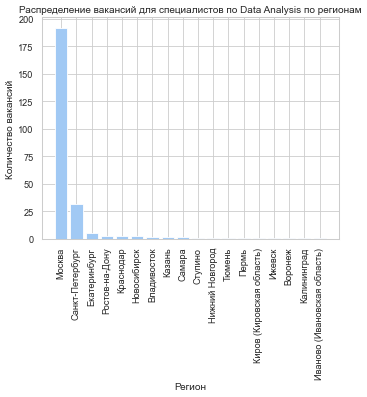

In [1591]:
# посмотрим также это на графике
area = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].area.value_counts()
area_names = area.index
area_counts = area.values
plt.figure(dpi=60)
plt.bar(area_names, area_counts)
plt.xlabel('Регион')
plt.ylabel('Количество вакансий')
plt.title('Распределение вакансий для специалистов по Data Analysis по регионам')
plt.xticks(rotation=90)
plt.show()

In [1592]:
# посмотрим в каких регионах размещены вакансии дата сайентистов
vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].area.value_counts()

area
Москва             405
Санкт-Петербург     50
Нижний Новгород     15
Новосибирск         11
Екатеринбург         9
Казань               6
Краснодар            4
Томск                3
Воронеж              3
Тюмень               3
Сочи                 2
Самара               2
Ижевск               2
Липецк               1
Пермь                1
Таганрог             1
Южно-Сахалинск       1
Челябинск            1
Калининград          1
Ярославль            1
Ростов-на-Дону       1
Name: count, dtype: int64

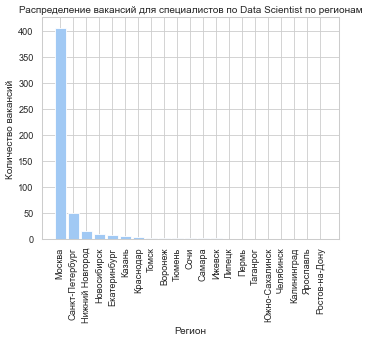

In [1593]:
# посмотрим также это на графике
area = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].area.value_counts()
area_names = area.index
area_counts = area.values
plt.figure(dpi=60)
plt.bar(area_names, area_counts)
plt.xlabel('Регион')
plt.ylabel('Количество вакансий')
plt.title('Распределение вакансий для специалистов по Data Scientist по регионам')
plt.xticks(rotation=90)
plt.show()

Как можем заметить из графика выше, также большинство вакансий размещены в Москве (405), на втором месте Санкт-Петербург (51), а также появились и другие города России, в которых требуются дата сайентисты (Нижний Новгород, Новосибирск, Екатеринбург).
На основе этих графиков, можем сделать вывод, что дата сайентисты сейчас более востребованы, чем аналитики данных.

In [1594]:
# посмотрим на даты (min и max)
print(vacancies_da_ds.published_at.min().strftime("%Y-%m-%d %X"))
print(vacancies_da_ds.published_at.max().strftime("%Y-%m-%d %X"))

2024-02-29 15:01:35
2024-04-30 12:51:55


Даты вычислены правильно.

In [1595]:
# посмотрим на опыт работы
vacancies_da_ds.experience.value_counts()

experience
Junior+ (1-3 years)      367
Middle (3-6 years)       356
Junior (no experince)     30
Senior (6+ years)         23
Name: count, dtype: int64

Из информации выше видим, что название опыта и количество лет соотносится. Одними из самых популярных вакансий являются джуниоры с опытом работы (1-3 года). Здесь аномальных значений нет.

In [1596]:
# посмотрим на график работы
vacancies_da_ds.schedule.value_counts()

schedule
Полный день         576
Удаленная работа    162
Гибкий график        33
Сменный график        5
Name: count, dtype: int64

In [1597]:
# в графике работе тоже все хорошо
# посмотрим на тип занятости
vacancies_da_ds.employment.value_counts()

employment
Полная занятость       760
Стажировка              12
Проектная работа         2
Частичная занятость      2
Name: count, dtype: int64

In [1598]:
# приведем индексы в порядок 
vacancies_da_ds.reset_index(drop=True, inplace=True)

In [1599]:
# сделаем столбец skills, который будет содержать навыки 
# создадим новую колонку 'skills_from_key_skills' в датафрейме 'vacancies_da_ds'

vacancies_da_ds['skills_from_key_skills'] = (
    vacancies_da_ds['key_skills'].map(
        lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')])))
)

# преобразуем колонку в список
skills_data = vacancies_da_ds['skills_from_key_skills'].to_list()

# сделаем словарь для подсчета частоты встречаемости каждого навыка
dictionary = {}

for sequence in skills_data:
    skills = set(sequence.split(', '))
    for skill in skills:
        dictionary[skill] = dictionary.get(skill, 0) + 1

# отфильтруем и оставим только те навыки, которые встречаются более 10 раз
dictionary = {k: v for k, v in dictionary.items() if v > 10}

# отсортируем словарь 'dictionary' по убыванию
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))


In [1600]:
print(dictionary)

{'python': 336, 'sql': 272, 'pandas': 249, '': 144, 'документация': 124, 'коммуникация': 96, 'анализ данных': 89, 'machine learning': 77, 'data analysis': 77, 'confluence': 68, 'ml': 62, 'data science': 59, 'аналитическое мышление': 55, 'big data': 53, 'математическая статистика': 51, 'юнит-экономика': 46, 'pytorch': 45, 'power bi': 38, 'nlp': 38, 'spark': 37, 'postgresql': 35, 'git': 34, 'hadoop': 31, 'numpy': 29, 'машинное обучение': 29, 'ms sql': 27, 'статистический анализ': 26, 'английский язык': 26, 'a/b тесты': 25, 'аналитика': 25, 'clickhouse': 24, 'работа с базами данных': 24, 'математическое моделирование': 23, 'linux': 22, 'tableau': 22, 'airflow': 20, 'математический анализ': 20, 'аналитические исследования': 20, 'docker': 20, 'базы данных': 18, 'tensorflow': 16, 'работа с большим объемом информации': 16, 'etl': 16, 'computer vision': 14, 'проактивность': 14, 'ms excel': 14, 'прогнозирование': 14, 'it': 13, 'data mining': 13, 'deep learning': 13, 'hive': 13, 'sklearn': 11, '

In [1601]:
# отредактируем словарь (уберем лишние)
del dictionary['']
del dictionary['анализ данных']
del dictionary['machine learning']
del dictionary['data analysis']
del dictionary['ml']
del dictionary['data science']
del dictionary['аналитика']
del dictionary['машинное обучение']
del dictionary['аналитические исследования']
del dictionary['работа с большим объемом информации']
del dictionary['it']
del dictionary['ms excel']

# сохраняем скиллы во множестве и добавляем нужные элементы
SKILLS = set(dictionary.keys()).union({'excel', 'powerpoint', 'power bi'})

In [1602]:
def calc_skills_from_description(value: str) -> str:
    res = []  
    value = value.lower().split()
    start = 0
    stop = 4
    
    while stop <= len(value):
        skill = ' '.join(value[start:stop])
        if skill in SKILLS:
            res.append(skill)
            start = stop 
            stop = start
        else:
            if start < stop - 1:
                stop -= 1
            else:
                start = stop
                stop = start + 4
    return ', '.join(set(res))

def calc_skills(row: dict) -> str:
    if row['skills_from_description'] == '':
        return row['skills_from_key_skills']
    if row['skills_from_key_skills'] == '':
        return row['skills_from_description']
    return ', '.join(set(row['skills_from_description'].split(', ') + row['skills_from_key_skills'].split(', ')))


In [1603]:
vacancies_da_ds['skills_from_description'] = vacancies_da_ds['description_lemmatized'].map(calc_skills_from_description)
vacancies_da_ds['skills'] = vacancies_da_ds.apply(calc_skills, axis=1)

In [1604]:
vacancies_da_ds

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date,skills_from_key_skills,skills_from_description,skills
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",...,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN,ds,2024-04-02,"разработка поисковых технологий, it, data scie...","airflow, clickhouse, hadoop, python, nlp","разработка поисковых технологий, airflow, it, ..."
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",...,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN,ds,2024-04-27,"оценка рисков, ad, кредитные риски, статистиче...","sql, python, статистический анализ","оценка рисков, кредитные риски, статистический..."
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",...,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN,ds,2024-04-08,"юнит-экономика, public speaking, research, dat...",,"юнит-экономика, public speaking, research, dat..."
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ds,2024-04-08,"юнит-экономика, public speaking, research, dat...",,"юнит-экономика, public speaking, research, dat..."
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ds,2024-04-08,"юнит-экономика, public speaking, research, dat...",,"юнит-экономика, public speaking, research, dat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,98118913,Data Scientist R&D,2024-04-28 23:23:54,https://hh.ru/vacancy/98118913,Открытая,VK,"VK, Рекламные технологии",Москва,Junior+ (1-3 years),[],...,NaN,ЗП не указана,NaN,NaN,NaN,ds,2024-04-28,,"sql, python","sql, python"
772,98118931,Data Scientist в VK Рекламу,2024-04-28 23:29:18,https://hh.ru/vacancy/98118931,Открытая,VK,"VK, Рекламные технологии",Москва,Junior+ (1-3 years),[],...,NaN,ЗП не указана,NaN,NaN,NaN,ds,2024-04-28,,"spark, airflow, hive, python, sql, hadoop","spark, airflow, hive, python, sql, hadoop"
773,98135067,Data Scientist,2024-04-29 14:10:28,https://hh.ru/vacancy/98135067,Открытая,Click,NaN,Санкт-Петербург,Middle (3-6 years),"['Reinforcement Learning', 'Pandas', 'Multi-Ar...",...,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Статис...",NaN,NaN,ds,2024-04-29,"pandas, математическая статистика, статистичес...","sql, python","pandas, математическая статистика, статистичес..."
774,98138306,Data Analyst,2024-04-29 16:17:24,https://hh.ru/vacancy/98138306,Открытая,Reinvent Baltics,NaN,Москва,Senior (6+ years),"['Английский язык', 'Data Analysis', 'Решение ...",...,NaN,ЗП не указана,"SQL, Python, Английский язык, Data Analysis, T...",Юнит-экономика,"Коммуникация, Решение проблем, Презентация рез...",da,2024-04-29,"прогнозирование, юнит-экономика, data ana

**В предобработке данных:**
- не указаны основные скиллы требуемые в работе,
- типы данных в столбцах указаны верно,
- объединили две выборки в одну, чтобы было удобнее работать и различать вакансии аналитиков данных и дата сайентистов,
- убрали повторяющиеся вакансии, так как не понятно к какой группе они в итоге относились,
- аномальных значений не выявлено,
- больше всего вакансий аналитиков данных и дата сайентистов размещены в Москве, и менее в Санкт-Петербурге, в остальных же городах количество вакансий часто не превышает и 5 шт.,
- анализируем период с 29 февраля по 30 апреля 2024 года,
- больше всего в вакансиях ищут джунов с опытом работы 1-3 года, на полный день и полную занятость,
- создали столбец, где объединили скиллы из описания вакансии.

С предобработкой данных закончили, можем приступить к исследовательскому анализу.

## Исследовательский анализ

In [1605]:
# посмотрим на соотношение дата сайентистов и аналитиков данных в нашем датасете на диаграмме
# сначала вычислим сколько всего у нас вакансий
df = vacancies_da_ds.name_type.value_counts().reset_index()
print(vacancies_da_ds.shape[0])

776


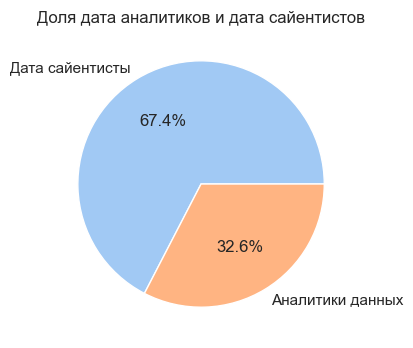

In [1606]:
# теперь посмотрим сколько из 782 вакансий дата аналитиков и дата сайентистов
plt.figure(figsize=(4, 4))
plt.pie(
    df['count'], 
    labels=['Дата сайентисты', 'Аналитики данных'], 
    autopct='%1.1f%%'
)
plt.title('Доля дата аналитиков и дата сайентистов')
plt.show()

Из диаграммы видно, что большинство вакансий представлено для дата сайентистов.

### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science

In [1483]:
# посмотрим сколько всего вакансий аналитиков данных
data_analyst = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].experience.value_counts().sort_index()
print (data_analyst.sum())

253


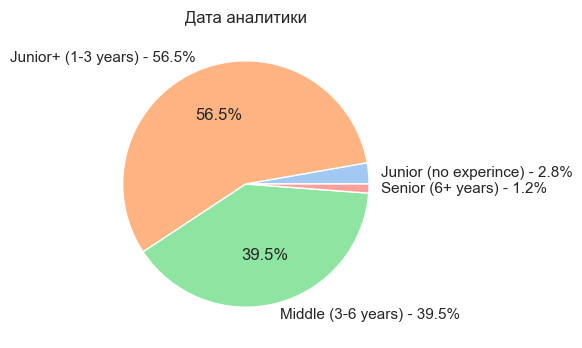

In [1484]:
# посмотрим на диаграмме распределение доли грейдов для аналитиков данных
plt.figure(figsize=(4, 4))
plt.pie(
      data_analyst, 
      labels=[lbl + f' - {value / data_analyst.sum():.1%}' for lbl, value in data_analyst.items()], 
      autopct=autopct_generator(10),
)
plt.title('Дата аналитики')
plt.show()

Из диаграммы выше, видно:
- на вакансии аналитиков данных 56.6% требуется на позицию джуниора с небольшим опытом работы (1-3 года);
- на 17.1% меньше требуется дата аналитиков на вакансию мидла (39.5%) с опытом работы 3-6 лет;
- меньше всего вакансий размещено на синьеров с опытом работы более 6 лет.

In [1485]:
# посмотрим сколько всего вакансий дата сайентистов
data_science = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].experience.value_counts().sort_index()
print (data_science.sum())

523


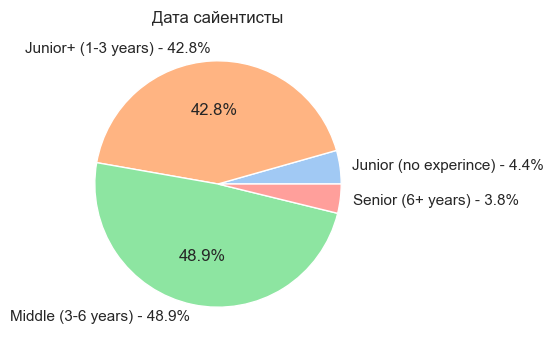

In [1486]:
# посмотрим на диаграмме распределение доли грейдов для дата сайентистов
plt.figure(figsize=(4, 4))
plt.pie(
    data_science, 
    labels=[lbl + f' - {value / data_science.sum():.1%}' for lbl, value in data_science.items()],
    autopct=autopct_generator(10),
    )
plt.title('Дата сайентисты')
plt.show()

Из диаграммы, можем сделать выводы:
- больше всего вакансий размещено для мидл дата сайентистов - 48.7%;
- также значительную часть занимают вакансии джунов с опытом работы 1-3 года;
- вакансии для позиции джунов без опыта работы и для синьеров с 6+ летним стажем работы в процентном соотношении примерно одинаковы

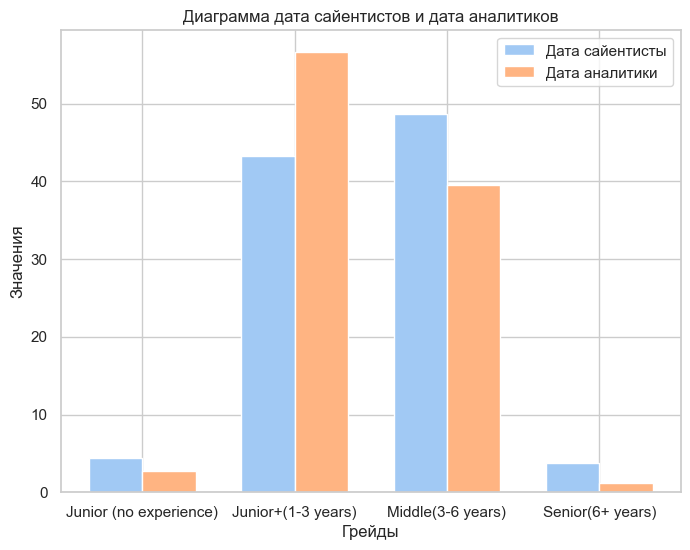

In [1487]:
labels = ['Junior (no experience)', 'Junior+(1-3 years)', 'Middle(3-6 years)', 'Senior(6+ years)']
values_data_science = [4.4, 43.2, 48.7, 3.8]  # значения для дата сайентистов
values_data_analyst = [2.7, 56.6, 39.5, 1.2]  # значения для дата аналитиков

x = np.arange(len(labels))  # положения столбцов
width = 0.35  # ширина столбцов

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, values_data_science, width, label='Дата сайентисты')
bars2 = ax.bar(x + width/2, values_data_analyst, width, label='Дата аналитики')

ax.set_ylabel('Значения')
ax.set_xlabel('Грейды')
ax.set_title('Диаграмма дата сайентистов и дата аналитиков')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

По графику выше, можем сделать выводы:
- для новичков (Junior) дата сайентистов шанс найти себе работу чуть выше, чем для аналитиков данных, так как вакансий на Junior дата скайнс больше на 1.7%;
- ситуация для мидл  и синьер специалистов дата скайнс также выше, как и для Junior. Похоже компаниям нужны более опытные специалисты (эксперты), которые смогут самостоятельно решать разные технические вопросы, находить несколько вариантов выполнения задач, оптимизировать и ускорять свою работу, обладать широкими навыками и знаниями для выполнения любой рабочей задачи;
- а вот Junior+ с опытом работы больше нужны на вакансиях дата аналитиков, скорее всего сейчас нехватка именно специалистов, которые знают основы программирования, могут писать небольшие фрагменты кода и устранять несложные баги.

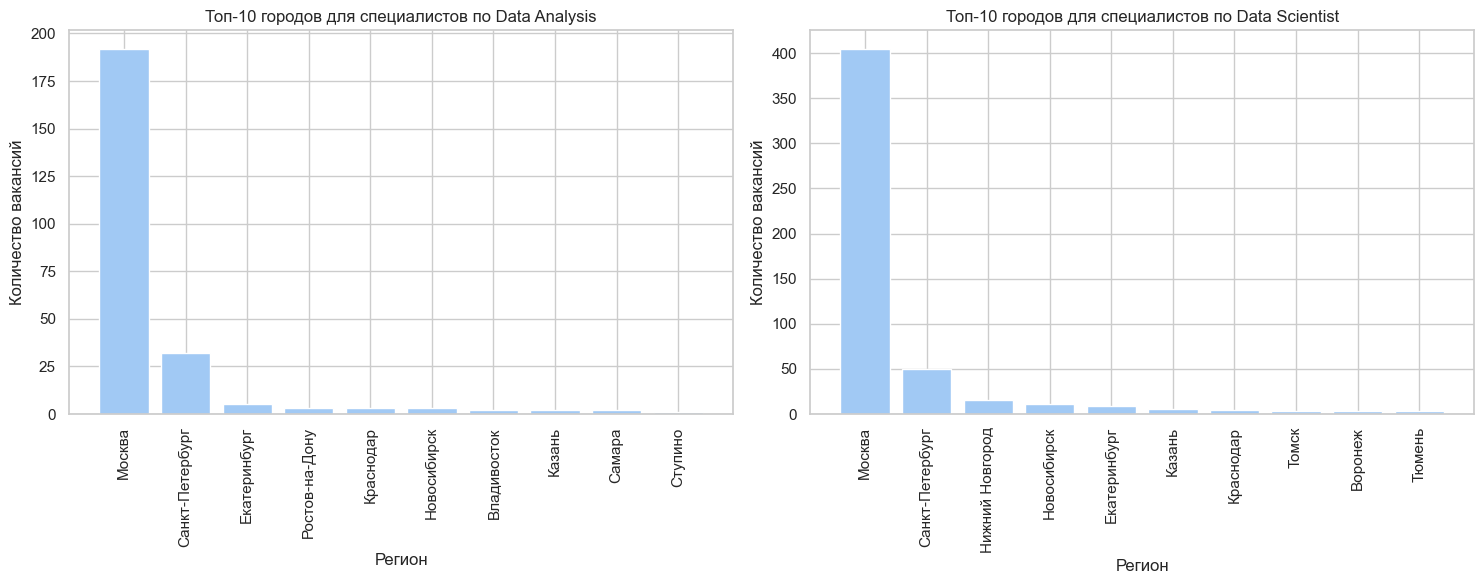

In [1488]:
# посмотрим на топ-10 городов по количеству вакансий среди дата сайентистов и дата аналитиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# график для Data Analysis
area_da = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].area.value_counts()
area_top_10_da = area_da.head(10)
area_names_da = area_top_10_da.index
area_counts_da = area_top_10_da.values

ax1.bar(area_names_da, area_counts_da)
ax1.set_xlabel('Регион')
ax1.set_ylabel('Количество вакансий')
ax1.set_title('Топ-10 городов для специалистов по Data Analysis')
ax1.tick_params(axis='x', rotation=90)

# график для Data Scientist
area_ds = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].area.value_counts()
area_top_10_ds = area_ds.head(10)
area_names_ds = area_top_10_ds.index
area_counts_ds = area_top_10_ds.values

ax2.bar(area_names_ds, area_counts_ds)
ax2.set_xlabel('Регион')
ax2.set_ylabel('Количество вакансий')
ax2.set_title('Топ-10 городов для специалистов по Data Scientist')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


По графикам видно, что большинство вакансий расположено в Москве. Это неудивительный фактор, так как Москва является крупным экономическим центром с огромным рынком труда. Здесь находятся множество крупных компаний, офисов, бизнес-парков, что создает спрос на работников. Также здесь развито множество отраслей бизнеса - финансы, технологии, медицина, образование, маркетинг и другие. Эта концентрация предприятий и компаний ведет к увеличенному спросу на талантливых специалистов. Почти в 8 раз меньше требуются и аналитики данных, и дата сайентисты в Санкт-Петербурге, в остальных же городах найти вакансии анализируемых специалистов будет затруднительно.

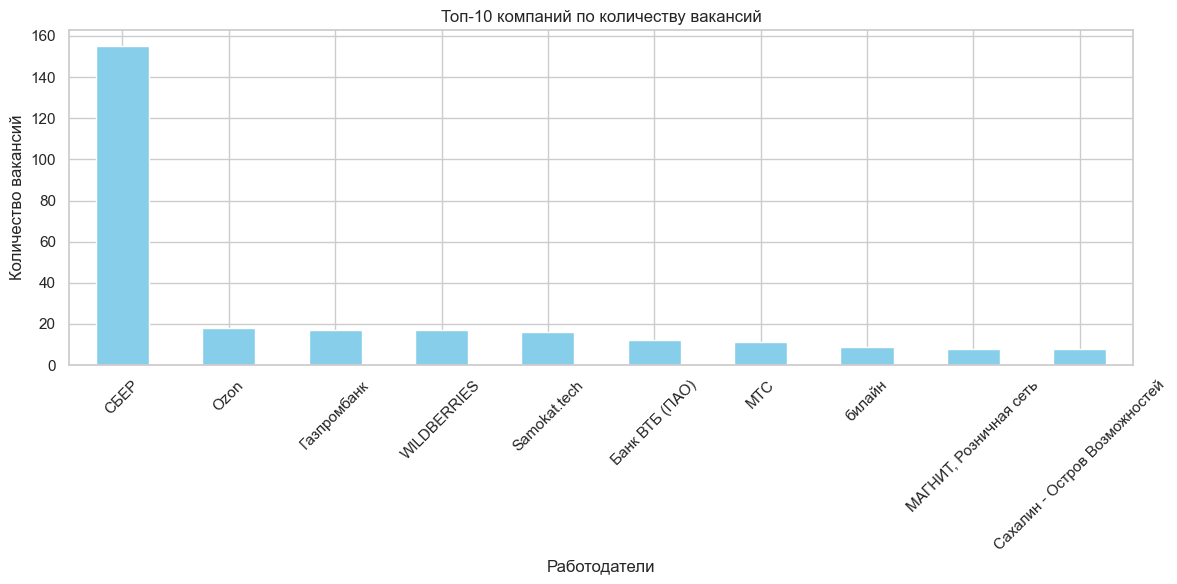

In [1489]:
# посмотрим на топ-10 работодателей по количеству вакансий
top_employers = vacancies_da_ds['employer'].value_counts().nlargest(10)

# создадим столбчатую диаграмму с топ работодателями
plt.figure(figsize=(12, 6))
top_employers.plot(kind='bar', color='skyblue')
plt.xlabel('Работодатели')
plt.ylabel('Количество вакансий')
plt.title('Топ-10 компаний по количеству вакансий')
plt.xticks(rotation=45)
plt.tight_layout()

# Отображаем график
plt.show()

СБЕР - публикуют больше всего вакансий для it-специалистов.

**Итоговый вывод:**
Исходя из проведенного анализа по вакансиям с 29 февраля по 30 апреля 2024 года, можем сделать вывод:
- большинство вакансий представлено для дата сайентистов;
- для новичков в области Data Science шансы найти работу немного выше, чем у аналитиков данных, так как количество вакансий для Junior Data Scientists на 1.7% больше. Ситуация для специалистов среднего уровня (Middle) или опытных (Senior) в Data Science также выглядит более перспективно, чем для Junior. Похоже, компаниям требуются более опытные специалисты (эксперты), способные самостоятельно решать разнообразные технические задачи, предлагать несколько вариантов их выполнения, оптимизировать процессы и повышать эффективность работы, обладающие широким спектром навыков и знаний для выполнения любой рабочей задачи. С другой стороны, специалисты уровня Junior с большим опытом работы более востребованы на вакансиях Data Analysts. Вероятно, в настоящее время есть дефицит специалистов, которые владеют основами программирования, способны писать небольшие участки кода и устранять небольшие ошибки (баги);
- по топу город размещения вакансий выделяется конечно же Москва, так как именно там самый центр развития различных отраслей бизнеса, где требуется достаточное количество специалистов;
- самое первое место по количеству размещенных вакансий среди работодателей занимает - Сбер, что вполне оправдано, так как это достаточно большая корпорация.

## Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils.

### **Ключевые навыки**

**Дата Аналитики**

In [1490]:
# посмотрим на ключевые навыки
key_skills = vacancies_da_ds['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(key_skills)

0                                   ['IT'
1       'Разработка поисковых технологий'
2                          'data science'
3                               'Python']
4                        ['Оценка рисков'
                      ...                
3496                 'Внимание к деталям'
3497                      'Бизнес-анализ'
3498                    'Прогнозирование'
3499                          'Power BI']
3500                                   []
Length: 3501, dtype: object


In [1491]:
# список достаточно большой, поэтому посмотрим на ключевые навыки дата аналитиков
da_key_skills = vacancies_da_ds[vacancies_da_ds.name_type == 'da']['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(da_key_skills.head())

0         ['HTTP'
1        'Pandas'
2         'Linux'
3           'Git'
4    'Clickhouse'
dtype: object


In [1492]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(da_key_skills))):
  da_key_skills[i] = da_key_skills[i].lower()
  if '[' in da_key_skills[i]:
    da_key_skills[i] = da_key_skills[i].replace('[', '')
  if ']' in da_key_skills[i]:
    da_key_skills[i] = da_key_skills[i].replace(']', '')
  if "'" in da_key_skills[i]:
    da_key_skills[i] = da_key_skills[i].replace("'", '')
  da_key_skills[i] = da_key_skills[i].strip()
da_key_skills = da_key_skills.dropna()

print(da_key_skills)

0                  ['HTTP'
1                   pandas
2                    linux
3                      git
4               clickhouse
               ...        
1291    внимание к деталям
1292         бизнес-анализ
1293       прогнозирование
1294              power bi
1295                      
Length: 1296, dtype: object


In [1493]:
# создадим датафрейм и добавим столбец для счета количества данных
da_key_skills = pd.DataFrame(da_key_skills)
da_key_skills['count'] = 1
da_key_skills = da_key_skills.groupby(0).count().sort_values(by='count', ascending=False).head(10)
print(da_key_skills)

                        count
0                            
sql                       140
python                    113
pandas                     69
data analysis              53
анализ данных              53
                           49
документация               37
коммуникация               34
аналитическое мышление     34
power bi                   33


In [1494]:
# уберем строку с пустыми значениями
da_key_skills = da_key_skills.reset_index().drop(index=5)
da_key_skills = da_key_skills.set_index(0)

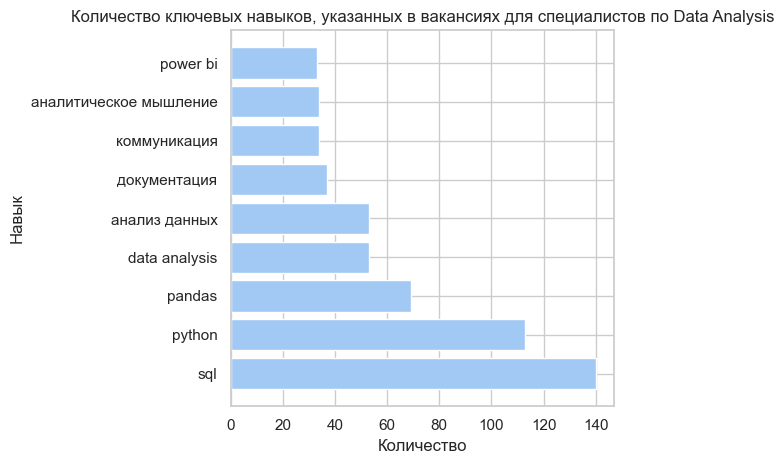

In [1495]:
# посмотрим на диаграмме
plt.barh(da_key_skills.dropna().index, da_key_skills.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество ключевых навыков, указанных в вакансиях для специалистов по Data Analysis')
plt.xticks()
plt.tight_layout()
plt.show()

Можем заметить, что для Дата Аналитиков на первом месте в ключевых навыках стоит - SQL, на втором - Python, на третьем - Pandas. Остальные же навыки требуются примерно в одинаковом соотношении, так, например, знание других программ могут не пригодиться в работе, а такие навыки, как: анализ данных, документация, коммуникация, аналитическое мышление - подразумевается в работе аналитиков уже и эти навыки не вынесли в ключевые в вакансиях.

In [1496]:
# посмотрим на ключевые навыки среди дата аналитиков для джунов без опыта работы
da_junior_no_exp = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'da']['experience'] == 'Junior (no experince)']
da_junior_no_exp_key = da_junior_no_exp['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(da_junior_no_exp_key.head())

0                        []
1                 ['Pandas'
2                'Metabase'
3                  'Python'
4    'Финансовая аналитика'
dtype: object


In [1497]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(da_junior_no_exp_key))):
  da_junior_no_exp_key[i] = da_junior_no_exp_key[i].lower()
  if '[' in da_junior_no_exp_key[i]:
    da_junior_no_exp_key[i] = da_junior_no_exp_key[i].replace('[', '')
  if ']' in da_junior_no_exp_key[i]:
    da_junior_no_exp_key[i] = da_junior_no_exp_key[i].replace(']', '')
  if "'" in da_junior_no_exp_key[i]:
    da_junior_no_exp_key[i] = da_junior_no_exp_key[i].replace("'", '')
  da_junior_no_exp_key[i] = da_junior_no_exp_key[i].strip()

print(da_junior_no_exp_key.head())

0                      []
1                  pandas
2                metabase
3                  python
4    финансовая аналитика
dtype: object


In [1498]:
# создадим датафрейм и добавим столбец для счета количества данных
da_junior_no_exp_key = pd.DataFrame(da_junior_no_exp_key)
da_junior_no_exp_key['count'] = 1
da_junior_no_exp_key = da_junior_no_exp_key.groupby(0).count().sort_values(by='count', ascending=False)
print(da_junior_no_exp_key.head())

          count
0              
python        4
sql           4
pandas        3
              2
big data      1


In [1499]:
# уберем строку с пустыми значениями
da_junior_no_exp_key = da_junior_no_exp_key.reset_index().drop(index=3)
da_junior_no_exp_key = da_junior_no_exp_key.set_index(0)
print(da_junior_no_exp_key.head())

               count
0                   
python             4
sql                4
pandas             3
big data           1
data analysis      1


Как видно на списке выше, то среди ключевых навыков у джунов без опыта работы, также популярны навыки: SQL, Python и Pandas.

In [1500]:
# посмотрим на ключевые навыки среди дата аналитиков для джунов+ (1-3 года)
da_junior = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'da']['experience'] == 'Junior+ (1-3 years)']
da_junior_key = da_junior['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(da_junior_key.head())

0         ['HTTP'
1        'Pandas'
2         'Linux'
3           'Git'
4    'Clickhouse'
dtype: object


In [1501]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(da_junior_key))):
  da_junior_key[i] = da_junior_key[i].lower()
  if '[' in da_junior_key[i]:
    da_junior_key[i] = da_junior_key[i].replace('[', '')
  if ']' in da_junior_key[i]:
    da_junior_key[i] = da_junior_key[i].replace(']', '')
  if "'" in da_junior_key[i]:
    da_junior_key[i] = da_junior_key[i].replace("'", '')
  da_junior_key[i] = da_junior_key[i].strip()

print(da_junior_key.head())

0       ['HTTP'
1        pandas
2         linux
3           git
4    clickhouse
dtype: object


In [1502]:
# создадим датафрейм и добавим столбец для счета количества данных
da_junior_key = pd.DataFrame(da_junior_key)
da_junior_key['count'] = 1
da_junior_key = da_junior_key.groupby(0).count().sort_values(by='count', ascending=False).head(6)
print(da_junior_key.head())

                        count
0                            
sql                        87
python                     61
pandas                     38
анализ данных              36
аналитическое мышление     26


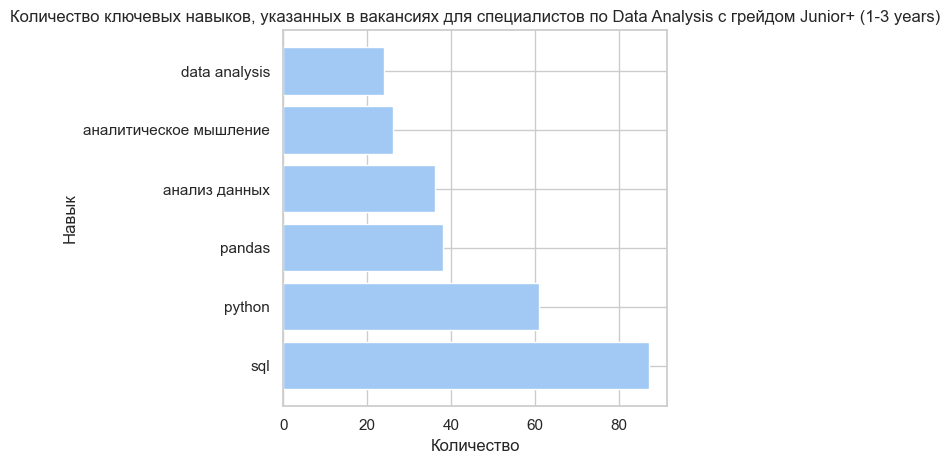

In [1503]:
# посмотрим на диаграмме
plt.barh(da_junior_key.dropna().index, da_junior_key.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество ключевых навыков, указанных в вакансиях для специалистов по Data Analysis с грейдом Junior+ (1-3 years)')
plt.xticks()
plt.tight_layout()
plt.show()

Как можем заметить, для грейда Junior+ (1-3 years) также нет никаких особых изменений в первый трех ключевых навыках.

In [1504]:
# посмотрим на ключевые навыки среди дата аналитиков для миддлов
da_middle = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'da']['experience'] == 'Middle (3-6 years)']
da_middle_key = da_middle['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(da_middle_key.head())

0           ['Pandas'
1    'Анализ данных']
2        ['A/B тесты'
3        'confluence'
4               'SQL'
dtype: object


In [1505]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(da_middle_key))):
  da_middle_key[i] = da_middle_key[i].lower()
  if '[' in da_middle_key[i]:
    da_middle_key[i] = da_middle_key[i].replace('[', '')
  if ']' in da_middle_key[i]:
    da_middle_key[i] = da_middle_key[i].replace(']', '')
  if "'" in da_middle_key[i]:
    da_middle_key[i] = da_middle_key[i].replace("'", '')
  da_middle_key[i] = da_middle_key[i].strip()

print(da_middle_key)

0          ['Pandas'
1      анализ данных
2          a/b тесты
3         confluence
4                sql
           ...      
445     коммуникация
446     документация
447       confluence
448     коммуникация
449                 
Length: 450, dtype: object


In [1506]:
# создадим датафрейм и добавим столбец для счета количества данных
da_middle_key = pd.DataFrame(da_middle_key)
da_middle_key['count'] = 1
da_middle_key = da_middle_key.groupby(0).count().sort_values(by='count', ascending=False).head(6)
print(da_middle_key.head())

               count
0                   
sql               46
python            45
data analysis     27
pandas            26
                  24


In [1507]:
# уберем строку с пустыми значениями
da_middle_key = da_middle_key.reset_index().drop(index=4)
da_middle_key = da_middle_key.set_index(0)

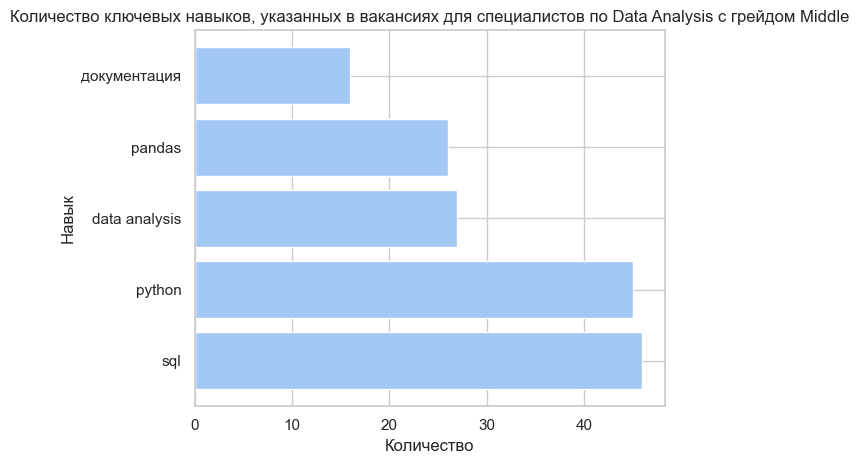

In [1508]:
# посмотрим на диаграмме
plt.barh(da_middle_key.dropna().index, da_middle_key.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество ключевых навыков, указанных в вакансиях для специалистов по Data Analysis с грейдом Middle')
plt.xticks()
plt.tight_layout()
plt.show()

Для грейда Middle на лидирующих местах остаются SQL и Python, а вот Pandas сравнялся еще с одним навыком Data Analysis.

In [1509]:
# посмотрим на ключевые навыки среди дата аналитиков для синьеров
da_senior = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'da']['experience'] == 'Senior (6+ years)']
da_senior_key = da_senior['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(da_senior_key.head())

0         ['Pandas'
1    'Документация'
2      'confluence'
3          'Python'
4       'A/B тесты'
dtype: object


In [1510]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(da_senior_key))):
  da_senior_key[i] = da_senior_key[i].lower()
  if '[' in da_senior_key[i]:
    da_senior_key[i] = da_senior_key[i].replace('[', '')
  if ']' in da_senior_key[i]:
    da_senior_key[i] = da_senior_key[i].replace(']', '')
  if "'" in da_senior_key[i]:
    da_senior_key[i] = da_senior_key[i].replace("'", '')
  da_senior_key[i] = da_senior_key[i].strip()

print(da_senior_key.head())

0       ['Pandas'
1    документация
2      confluence
3          python
4       a/b тесты
dtype: object


In [1511]:
# создадим датафрейм и добавим столбец для счета количества данных
da_senior_key = pd.DataFrame(da_senior_key)
da_senior_key['count'] = 1
da_senior_key = da_senior_key.groupby(0).count().sort_values(by='count', ascending=False).head(6)
print(da_senior_key.head())

                       count
0                           
python                     3
sql                        3
['Pandas'                  1
английский язык            1
статистический анализ      1


Можем сделать вывод по списку выше, что для синьеров, также как и для миддлов на лидирующих местах остаются 2 ключевых навыка - SQL и Python.

**Дата сайентисты**

In [1512]:
# теперь посмотрим на ключевые навыки дата сайентистов
ds_key_skills = vacancies_da_ds[vacancies_da_ds.name_type == 'ds']['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(ds_key_skills.head())

0                                ['IT'
1    'Разработка поисковых технологий'
2                       'data science'
3                            'Python']
4                     ['Оценка рисков'
dtype: object


In [1513]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(ds_key_skills))):
  ds_key_skills[i] = ds_key_skills[i].lower()
  if '[' in ds_key_skills[i]:
    ds_key_skills[i] = ds_key_skills[i].replace('[', '')
  if ']' in ds_key_skills[i]:
    ds_key_skills[i] = ds_key_skills[i].replace(']', '')
  if "'" in ds_key_skills[i]:
    ds_key_skills[i] = ds_key_skills[i].replace("'", '')
  ds_key_skills[i] = ds_key_skills[i].strip()
ds_key_skills = ds_key_skills.dropna()

print(ds_key_skills)

0                                 ['IT'
1       разработка поисковых технологий
2                          data science
3                                python
4                         оценка рисков
                     ...               
2200                multi-armed bandits
2201                             python
2202          математическая статистика
2203              статистический анализ
2204                                sql
Length: 2205, dtype: object


In [1514]:
# создадим датафрейм и добавим столбец для счета количества данных
ds_key_skills = pd.DataFrame(ds_key_skills)
ds_key_skills['count'] = 1
ds_key_skills = ds_key_skills.groupby(0).count().sort_values(by='count', ascending=False).head(10)
print(ds_key_skills)

                  count
0                      
python              223
pandas              188
sql                 132
                     95
документация         87
machine learning     76
коммуникация         62
ml                   60
data science         54
pytorch              46


In [1515]:
# уберем строку с пустыми значениями
ds_key_skills = ds_key_skills.reset_index().drop(index=3)
ds_key_skills = ds_key_skills.set_index(0)

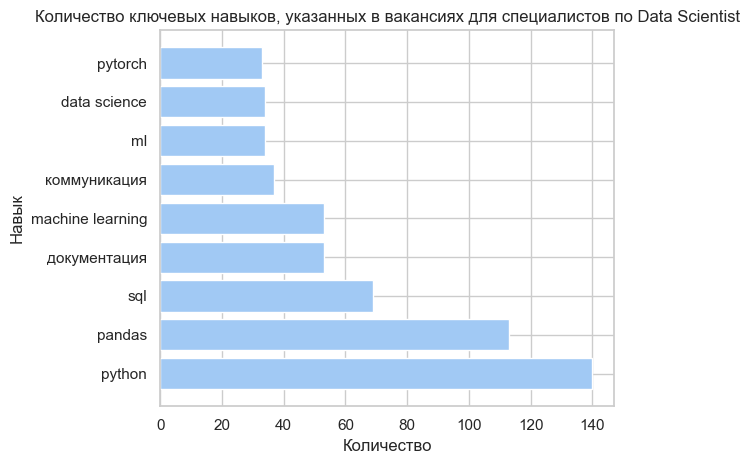

In [1516]:
# посмотрим на диаграмме
plt.barh(ds_key_skills.dropna().index, da_key_skills.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество ключевых навыков, указанных в вакансиях для специалистов по Data Scientist')
plt.xticks()
plt.tight_layout()
plt.show()

Как можем заметить, лидирующие места по навыкам также занимают Python, Pandas и SQL. Но есть момент, для Дата Сайентистов в первую очередь важен Python, потом Pandas и завершают лидирующую тройку SQL. Знание других программ для этой специальности достаточно часто упоминают в ключевых навыках в вакансиях.

In [1517]:
# посмотрим на ключевые навыки среди дата сайентистов для джунов без опыта работы
ds_junior_no_exp = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'ds']['experience'] == 'Junior (no experince)']
ds_junior_no_exp_key = ds_junior_no_exp['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(ds_junior_no_exp_key.head())

0          ['Machine Learning'
1            'Public Speaking'
2    'Презентация результатов'
3           'Writing Articles'
4                   'Research'
dtype: object


In [1518]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(ds_junior_no_exp_key))):
  ds_junior_no_exp_key[i] = ds_junior_no_exp_key[i].lower()
  if '[' in ds_junior_no_exp_key[i]:
    ds_junior_no_exp_key[i] = ds_junior_no_exp_key[i].replace('[', '')
  if ']' in ds_junior_no_exp_key[i]:
    ds_junior_no_exp_key[i] = ds_junior_no_exp_key[i].replace(']', '')
  if "'" in ds_junior_no_exp_key[i]:
    ds_junior_no_exp_key[i] = ds_junior_no_exp_key[i].replace("'", '')
  ds_junior_no_exp_key[i] = ds_junior_no_exp_key[i].strip()

print(ds_junior_no_exp_key.head())

0        ['Machine Learning'
1            public speaking
2    презентация результатов
3           writing articles
4                   research
dtype: object


In [1519]:
# создадим датафрейм и добавим столбец для счета количества данных
ds_junior_no_exp_key = pd.DataFrame(ds_junior_no_exp_key)
ds_junior_no_exp_key['count'] = 1
ds_junior_no_exp_key = ds_junior_no_exp_key.groupby(0).count().sort_values(by='count', ascending=False).head(6)
print(ds_junior_no_exp_key.head())

              count
0                  
                 12
python            5
документация      3
confluence        2
data mining       2


In [1520]:
# уберем строку с пустыми значениями
ds_junior_no_exp_key = ds_junior_no_exp_key.reset_index().drop(index=0)
ds_junior_no_exp_key = ds_junior_no_exp_key.set_index(0)
print(ds_junior_no_exp_key.head())

                           count
0                               
python                         5
документация                   3
confluence                     2
data mining                    2
математическая статистика      2


Как видно из списка выше, по количеству навыков в вакансиях дата сайентистов с позицией джун без опыта побеждает - Python. А вот привычного нам SQL уже нет в списке, зато появились: "Документация", "Сonfluence".

In [1521]:
# посмотрим на ключевые навыки среди дата сайентистов для джунов+ (1-3 года)
ds_junior = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'ds']['experience'] == 'Junior+ (1-3 years)']
ds_junior_key = ds_junior['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(ds_junior_key.head())

0          ['Machine Learning'
1            'Public Speaking'
2    'Презентация результатов'
3           'Writing Articles'
4                   'Research'
dtype: object


In [1522]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(ds_junior_key))):
  ds_junior_key[i] = ds_junior_key[i].lower()
  if '[' in ds_junior_key[i]:
    ds_junior_key[i] = ds_junior_key[i].replace('[', '')
  if ']' in ds_junior_key[i]:
    ds_junior_key[i] = ds_junior_key[i].replace(']', '')
  if "'" in ds_junior_key[i]:
    ds_junior_key[i] = ds_junior_key[i].replace("'", '')
  ds_junior_key[i] = ds_junior_key[i].strip()

print(ds_junior_key.head())

0        ['Machine Learning'
1            public speaking
2    презентация результатов
3           writing articles
4                   research
dtype: object


In [1523]:
# создадим датафрейм и добавим столбец для счета количества данных
ds_junior_key = pd.DataFrame(ds_junior_key)
ds_junior_key['count'] = 1
ds_junior_key = ds_junior_key.groupby(0).count().sort_values(by='count', ascending=False).head(6)
print(ds_junior_key)

                  count
0                      
pandas               99
python               95
sql                  76
документация         37
                     30
machine learning     26


In [1524]:
# уберем строку с пустыми значениями
ds_junior_key = ds_junior_key.reset_index().drop(index=4)
ds_junior_key = ds_junior_key.set_index(0)

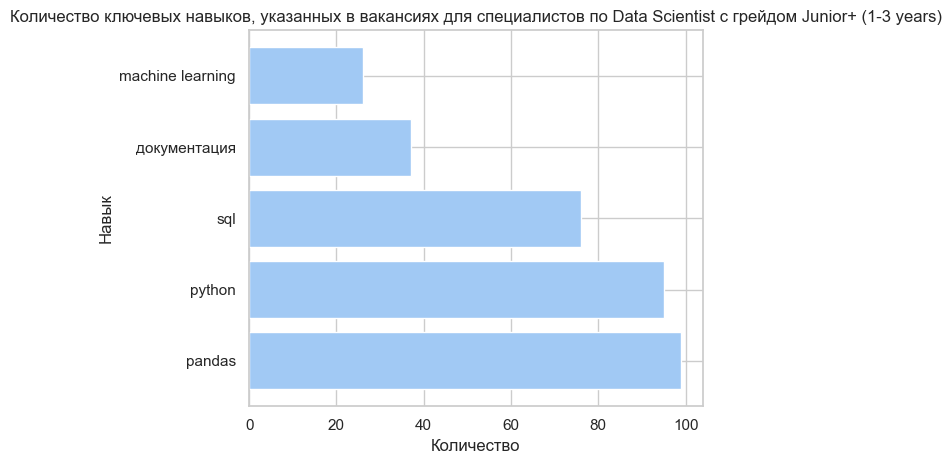

In [1525]:
# посмотрим на диаграмме
plt.barh(ds_junior_key.dropna().index, ds_junior_key.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество ключевых навыков, указанных в вакансиях для специалистов по Data Scientist с грейдом Junior+ (1-3 years)')
plt.xticks()
plt.tight_layout()
plt.show()

Для грейда джунов дата сайентистов с небольшим опытом работы лидируещее место в ключевых навыках занимает - Pandas, а Python уходит на второе место, также возращается SQL.

In [1526]:
# посмотрим на ключевые навыки среди дата сайентистов для миддлов
ds_middle = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'ds']['experience'] == 'Middle (3-6 years)']
ds_middle_key = ds_middle['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(ds_middle_key.head())

0                                ['IT'
1    'Разработка поисковых технологий'
2                       'data science'
3                            'Python']
4                     ['Оценка рисков'
dtype: object


In [1527]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(ds_middle_key))):
  ds_middle_key[i] = ds_middle_key[i].lower()
  if '[' in ds_middle_key[i]:
    ds_middle_key[i] = ds_middle_key[i].replace('[', '')
  if ']' in ds_middle_key[i]:
    ds_middle_key[i] = ds_middle_key[i].replace(']', '')
  if "'" in ds_middle_key[i]:
    ds_middle_key[i] = ds_middle_key[i].replace("'", '')
  ds_middle_key[i] = ds_middle_key[i].strip()

print(ds_middle_key)

0                                 ['IT'
1       разработка поисковых технологий
2                          data science
3                                python
4                         оценка рисков
                     ...               
1094                multi-armed bandits
1095                             python
1096          математическая статистика
1097              статистический анализ
1098                                sql
Length: 1099, dtype: object


In [1528]:
# создадим датафрейм и добавим столбец для счета количества данных
ds_middle_key = pd.DataFrame(ds_middle_key)
ds_middle_key['count'] = 1
ds_middle_key = ds_middle_key.groupby(0).count().sort_values(by='count', ascending=False).head(6)
print(ds_middle_key.head())

              count
0                  
python          114
pandas           81
sql              53
                 50
документация     44


In [1529]:
# уберем строку с пустыми значениями
ds_middle_key = ds_middle_key.reset_index().drop(index=3)
ds_middle_key = ds_middle_key.set_index(0)

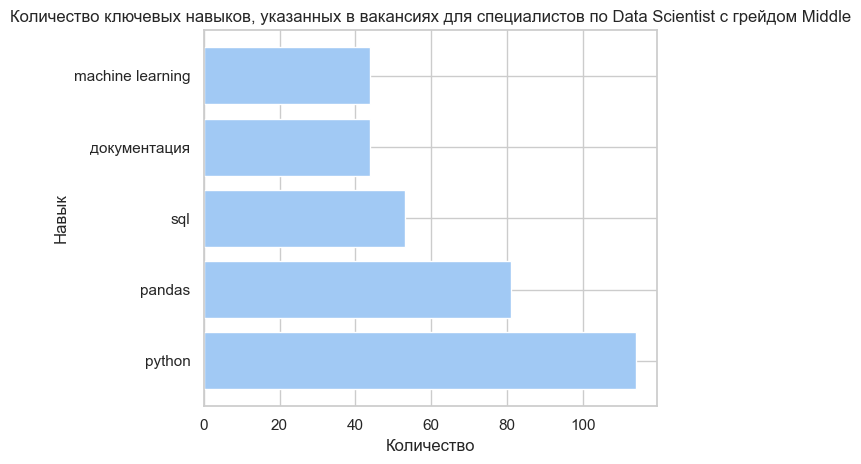

In [1530]:
# посмотрим на диаграмме
plt.barh(ds_middle_key.dropna().index, ds_middle_key.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество ключевых навыков, указанных в вакансиях для специалистов по Data Scientist с грейдом Middle')
plt.xticks()
plt.tight_layout()
plt.show()

На лидирующих местах все также Python, Pandas и SQL. Для грейда миддл в вакансиях чаще указывают навык знания - Python, а потом уже Pandas по сравнению с джунами (1-3 года).

In [1531]:
# посмотрим на ключевые навыки среди дата аналитиков для синьеров
ds_senior = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].loc[vacancies_da_ds[vacancies_da_ds.name_type == 'ds']['experience'] == 'Senior (6+ years)']
ds_senior_key = ds_senior['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(ds_senior_key.head())

0    ['Machine Learning'
1                'Linux'
2               'Python'
3    'Машинное обучение'
4             'PyTorch']
dtype: object


In [1532]:
# удалим лишние пробелы и приведем все к одному регистру
for i in range(1,(len(ds_senior_key))):
  ds_senior_key[i] = ds_senior_key[i].lower()
  if '[' in ds_senior_key[i]:
    ds_senior_key[i] = ds_senior_key[i].replace('[', '')
  if ']' in ds_senior_key[i]:
    ds_senior_key[i] = ds_senior_key[i].replace(']', '')
  if "'" in ds_senior_key[i]:
    ds_senior_key[i] = ds_senior_key[i].replace("'", '')
  ds_senior_key[i] = ds_senior_key[i].strip()

print(ds_senior_key.head())

0    ['Machine Learning'
1                  linux
2                 python
3      машинное обучение
4                pytorch
dtype: object


In [1533]:
# создадим датафрейм и добавим столбец для счета количества данных
ds_senior_key = pd.DataFrame(ds_senior_key)
ds_senior_key['count'] = 1
ds_senior_key = ds_senior_key.groupby(0).count().sort_values(by='count', ascending=False).head(6)
print(ds_senior_key.head())

              count
0                  
python            9
pandas            6
ml                5
                  3
data science      3


In [1534]:
# уберем строку с пустыми значениями
ds_senior_key = ds_senior_key.reset_index().drop(index=3)
ds_senior_key = ds_senior_key.set_index(0)

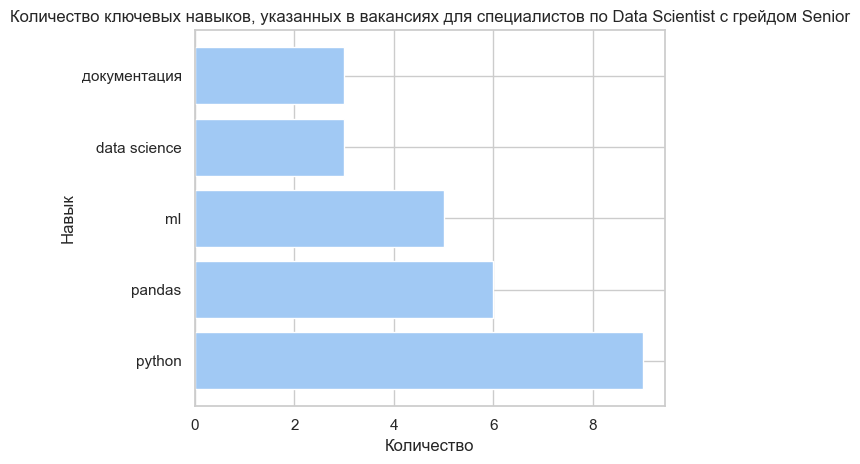

In [1535]:
# посмотрим на диаграмме
plt.barh(ds_senior_key.dropna().index, ds_senior_key.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество ключевых навыков, указанных в вакансиях для специалистов по Data Scientist с грейдом Senior')
plt.xticks()
plt.tight_layout()
plt.show()

Первые два места для грейда синьер, аналогичны грейду миддл. А вот начиная с третьего места можем заметить разницу, уже не требуется SQL, а ML.

**Вывод:**

- Навыки требующиеся для аналитиков данных и дата сайентистов в джуниорах пересекаются между собой, на первых местах всегда Python, Pandas, SQL;
- Для дата аналитиков чаще требуется SQL, а для дата сайентистов Python/

**Хард скиллы**

In [1536]:
# посмотрим на хард скиллы в датафрейме
hard_skills_from_description = vacancies_da_ds['hard_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(hard_skills_from_description)

0      Юнит-экономика
1      Юнит-экономика
2      Юнит-экономика
3              Pandas
4              Pandas
            ...      
347    Юнит-экономика
348            Pandas
349            Pandas
350    Юнит-экономика
351    Юнит-экономика
Length: 352, dtype: object


In [1537]:
# посмотрим и выделим важные хард скиллы для дата аналитиков
da_hard_skills = vacancies_da_ds[vacancies_da_ds.name_type == 'da']['hard_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(da_hard_skills.head())

0            Pandas
1            Pandas
2        confluence
3    Юнит-экономика
4            Pandas
dtype: object


In [1538]:
# поступим также, как и с ключевыми навыками, создадим датафрейм и добавим столбец для счета количества данных
da_hard_skills = pd.DataFrame(da_hard_skills)
da_hard_skills['count'] = 1
da_hard_skills = da_hard_skills.groupby(0).count().sort_values(by='count', ascending=False).head(10)
print(da_hard_skills)

                count
0                    
Pandas             64
confluence         26
Юнит-экономика      9
Google Sheets       1


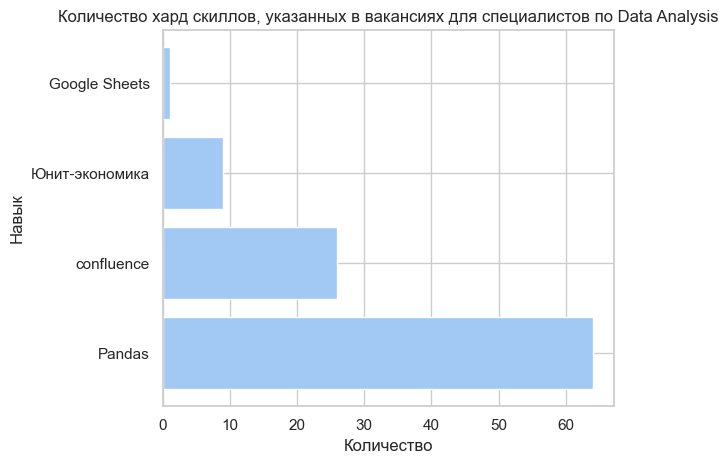

In [1539]:
# посмотрим на диаграмме
plt.barh(da_hard_skills.dropna().index, da_hard_skills.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество хард скиллов, указанных в вакансиях для специалистов по Data Analysis')
plt.xticks()
plt.tight_layout()
plt.show()

На диаграмме видно, что в хард скиллах для специалистов по Data Analysis указаны 4 навыка, на первом из них - Pandas.

In [1540]:
# теперь посмотрим и выделим важные хард скиллы для дата сайентистов
ds_hard_skills = vacancies_da_ds[vacancies_da_ds.name_type == 'ds']['hard_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(ds_hard_skills.head())

0    Юнит-экономика
1    Юнит-экономика
2    Юнит-экономика
3        confluence
4            Pandas
dtype: object


In [1541]:
ds_hard_skills = pd.DataFrame(ds_hard_skills)
ds_hard_skills['count'] = 1
ds_hard_skills = ds_hard_skills.groupby(0).count().sort_values(by='count', ascending=False).head(10)
print(ds_hard_skills)

                count
0                    
Pandas            173
confluence         42
Юнит-экономика     37


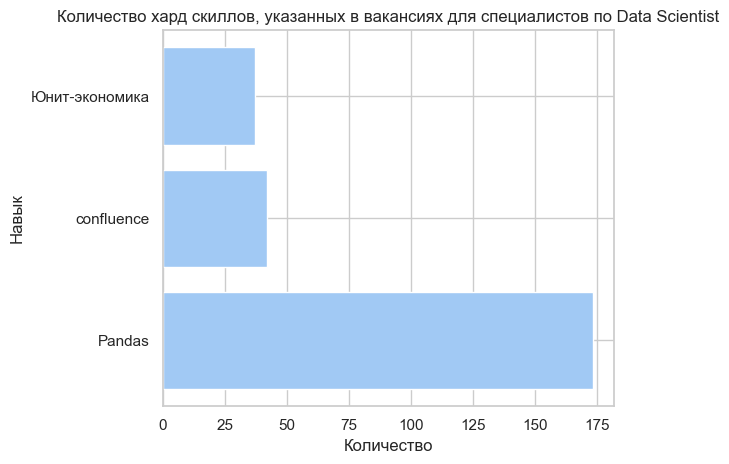

In [1542]:
# посмотрим на диаграмме
plt.barh(ds_hard_skills.dropna().index, ds_hard_skills.dropna()['count'])
plt.xlabel('Количество')
plt.ylabel('Навык')
plt.title('Количество хард скиллов, указанных в вакансиях для специалистов по Data Scientist')
plt.xticks()
plt.tight_layout()
plt.show()

Интересный момент, что для специалистов по Data Scientist тоже на первом месте среди хард скиллов стоит Pandas. А confluence и Юнит-экономика попадаются примерно в 22% вакансиях, где указан Pandas.

**Софт скиллы**

In [1543]:
# посмотрим теперь на софт скиллы и какая ситуация обстоит в вакансиях тут. Проделаем аналогичную работу хард скиллам
# для начала также посмотрим на софт скиллы во всем нашем датафрейме
soft_skills_from_description = vacancies_da_ds['soft_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(soft_skills_from_description)

0      Презентация результатов
1      Презентация результатов
2                 Документация
3                 Документация
4                 Коммуникация
                ...           
277               Документация
278               Коммуникация
279            Решение проблем
280    Презентация результатов
281         Внимание к деталям
Length: 282, dtype: object


In [1544]:
# посмотрим и выделим важные софт скиллы для дата аналитиков
da_soft_skills = vacancies_da_ds[vacancies_da_ds.name_type == 'da']['soft_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(da_soft_skills.head())

0              Документация
1              Документация
2    Аналитическое мышление
3           Решение проблем
4          Принятие решений
dtype: object


In [1545]:
# создадим датафрейм и добавим столбец для счета количества данных
da_soft_skills = pd.DataFrame(da_soft_skills)
da_soft_skills['count'] = 1
da_soft_skills = da_soft_skills.groupby(0).count().sort_values(by='count', ascending=False).head(10)
print(da_soft_skills)

                         count
0                             
Документация                37
Коммуникация                34
Аналитическое мышление       8
Проактивность                6
Переговоры                   4
Решение проблем              3
Принятие решений             2
Внимание к деталям           1
Критическое мышление         1
Презентация результатов      1


In [1546]:
# посмотрим и выделим важные софт скиллы для дата сайентистов
ds_soft_skills = vacancies_da_ds[vacancies_da_ds.name_type == 'ds']['soft_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
print(ds_soft_skills.head())

0    Презентация результатов
1    Презентация результатов
2               Коммуникация
3               Документация
4               Креативность
dtype: object


In [1547]:
# создадим датафрейм и добавим столбец для счета количества данных
ds_soft_skills = pd.DataFrame(ds_soft_skills)
ds_soft_skills['count'] = 1
ds_soft_skills = ds_soft_skills.groupby(0).count().sort_values(by='count', ascending=False).head(10)
print(ds_soft_skills)

                         count
0                             
Документация                87
Коммуникация                62
Аналитическое мышление      10
Креативность                 8
Проактивность                8
Презентация результатов      6
Принятие решений             2
Адаптивность                 1
Письменная коммуникация      1


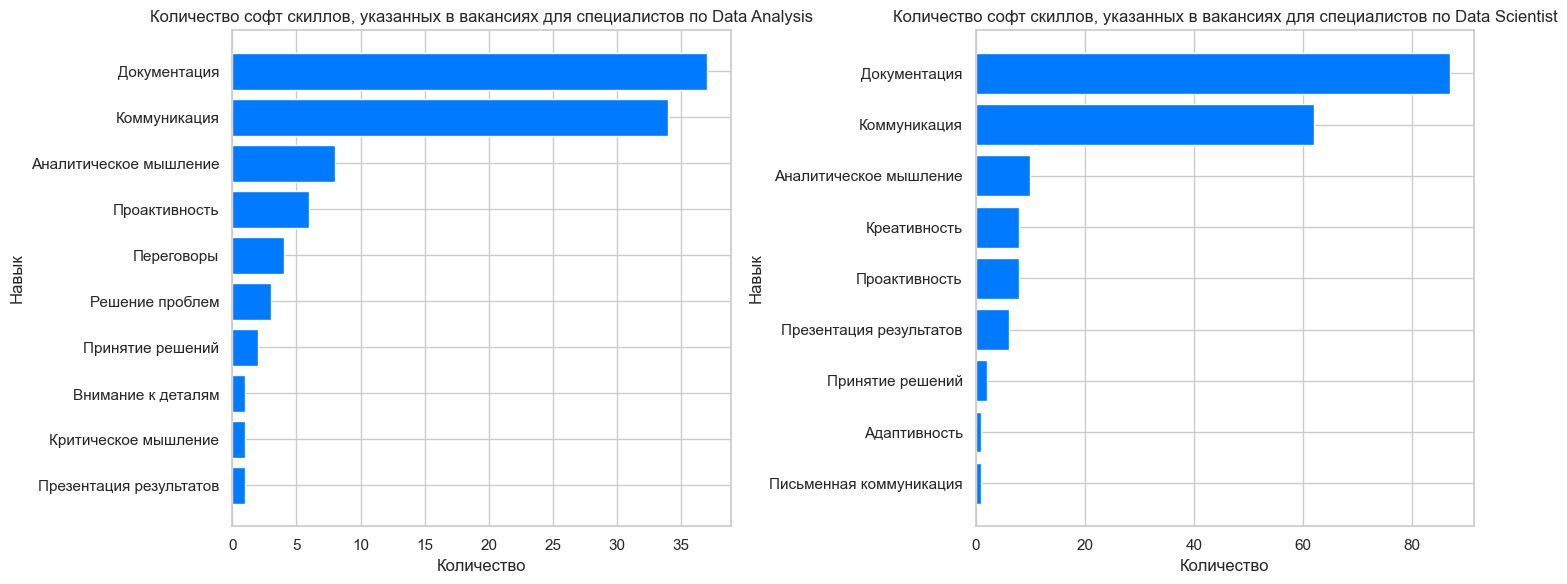

In [1549]:
# посмотрим на 2 графика сразу
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# график для специалистов по Data Analysis
ax1.barh(da_soft_skills.dropna().index, da_soft_skills.dropna()['count'], color='#007bff')
ax1.set_xlabel('Количество')
ax1.set_ylabel('Навык')
ax1.set_title('Количество софт скиллов, указанных в вакансиях для специалистов по Data Analysis')
ax1.invert_yaxis()  # Переверните ось y, чтобы расположить навыки сверху вниз

# график для специалистов по Data Scientist
ax2.barh(ds_soft_skills.dropna().index, ds_soft_skills.dropna()['count'], color='#007bff')
ax2.set_xlabel('Количество')
ax2.set_ylabel('Навык')
ax2.set_title('Количество софт скиллов, указанных в вакансиях для специалистов по Data Scientist')
ax2.invert_yaxis()  # Переверните ось y, чтобы расположить навыки сверху вниз

plt.tight_layout()
plt.show()

Из двух графиков видно, что первые 3 места в софт скиллах занимают "Документация", "Коммуникация" и "Аналитическое мышление" в вакансиях у обоих специалистов. Если же посмотрим на количество, то все же софт скиллы больше упоминаются и требуются в вакансиях у дата сайентистов. Остальные же скиллы разбросаны у двух специалистов по разному. Так, например, дата сайентистам нужно больше навыков: "Креативность", "Проактивность", "Презентация результатов", а дата аналитикам: "Проактивность", "Переговоры", "Решение проблем".

**Вывод:**
- Набор хард скиллов пересекается в обоих специальностях (Pandas, Confluence, Юнит-экономика) и Pandas занимает лидируещее место в них.
- Набор софт скиллов тоже пересекается между собоый в требуемых навыках. "Документация", "Коммуникация" и "Аналитическое мышление" - занимают первые места в вакансиях у специалистов. Но есть различие, для дата аналитиков важнее переговоры и решение проблем, а для дата сайентистов креативность и презентация результатов.

## Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы.

### Топ работодателей

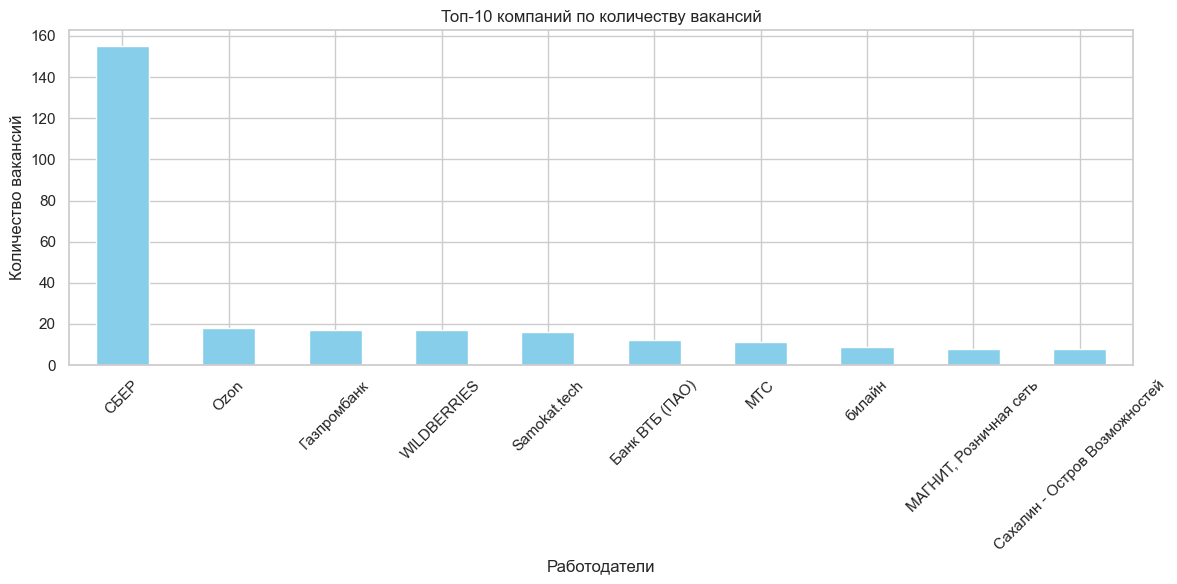

In [1550]:
# ранее уже смотрели топ-10 работодателей по количеству вакансий, на первом месте стоял - Сбер, продублируем график еще раз

# посмотрим на топ-10 работодателей по количеству вакансий
top_employers = vacancies_da_ds['employer'].value_counts().nlargest(10)

# создадим столбчатую диаграмму с топ работодателями
plt.figure(figsize=(12, 6))
top_employers.plot(kind='bar', color='skyblue')
plt.xlabel('Работодатели')
plt.ylabel('Количество вакансий')
plt.title('Топ-10 компаний по количеству вакансий')
plt.xticks(rotation=45)
plt.tight_layout()

# Отображаем график
plt.show()

In [1551]:
# посмотрим на компании теперь с разбивкой по грейдам для дата аналитиков
da_employer = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].groupby('employer').count().sort_values(by='name', ascending=False).head(10)
print(da_employer.index)

Index(['СБЕР', 'WILDBERRIES', 'МТС', 'Okko', 'МАГНИТ, Розничная сеть',
       '«UZUM TECHNOLOGIES».', 'Maxim technology', 'StudyWorld',
       'ЦРТ | Группа компаний', 'Марс'],
      dtype='object', name='employer')


In [1552]:
# посмотрим в сводной таблице
da_employer_tab = pd.pivot_table(vacancies_da_ds[vacancies_da_ds.name_type == 'da'], columns='experience', index='employer', values='name', aggfunc='count')
da_employer_tab

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
employer,,,,
ANCOR,1.00,NaN,NaN,NaN
AWG,NaN,1.00,NaN,NaN
Adequo,NaN,NaN,1.00,NaN
AliExpress,NaN,1.00,NaN,NaN
AppMagic,NaN,NaN,1.00,NaN
...,...,...,...,...
ЦРТ | Группа компаний,NaN,3.00,NaN,NaN
Центр Орбита,NaN,1.00,NaN,NaN
Центральный банк Российской Федерации,NaN,1.00,NaN,NaN


In [1607]:
# посмотрим на графике
fig = px.bar(da_employer_tab.sort_values(by=['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'Junior (no experince)'], ascending=False),
             title='Количество вакансий для Data Analysis по грейдам', orientation='h',
             labels={'employer':'Компания работодатель', 'value':'Количество вакансий'}, height=1000, width=1000)
fig.show()

In [1554]:
# посмотрим на компании теперь с разбивкой по грейдам для дата сайентистов
ds_employer = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].groupby('employer').count().sort_values(by='name', ascending=False).head(10)
print(ds_employer.index)

Index(['СБЕР', 'Ozon', 'Газпромбанк', 'Samokat.tech', 'Банк ВТБ (ПАО)',
       'билайн', 'Сахалин - Остров Возможностей', 'Ростелеком', 'Lamoda Tech',
       'Т1'],
      dtype='object', name='employer')


In [1555]:
# посмотрим в сводной таблице
ds_employer_tab = pd.pivot_table(vacancies_da_ds[vacancies_da_ds.name_type == 'ds'], columns='experience', index='employer', values='name', aggfunc='count')
ds_employer_tab

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
employer,,,,
1221Системс,NaN,7.00,NaN,NaN
2ГИС,NaN,NaN,4.00,NaN
7RedLines,NaN,NaN,NaN,1.00
AMarkets,NaN,NaN,1.00,NaN
ARK,NaN,3.00,2.00,NaN
...,...,...,...,...
Эвокарго,NaN,NaN,1.00,NaN
Экспобанк,NaN,NaN,1.00,NaN
Эр-1,1.00,NaN,NaN,NaN


In [1556]:
# посмотрим на графике
fig = px.bar(ds_employer_tab.sort_values(by=['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'Junior (no experince)'], ascending=False),
             title='Количество вакансий для Data Scientist по грейдам', orientation='h',
             labels={'employer':'Компания работодатель', 'value':'Количество вакансий'}, height=1000, width=1000)
fig.show()

**Вывод:**

Списки компаний, которые ищут себе дата сайентистов и дата аналитиков существенно различаются за анализируемый период, кроме одной компании - Сбер. Но при этом по количеству размещенных вакансий, Сбер ищет больше дата сайентистов (более 100 вакансий), чем дата аналитиков (~45 вакансий). Также можем обратить внимание на общее количество вакансий дата сайентистов, на графиках заметно, что их ищут чаще, чем дата аналитиков. На графике дата аналитиков можно заметить, что вакансии в основном размещены для джунов с небольшим опытом работы и миддлов, вакансий для синьеров и джунов без опыта почти не видно. На графике дата сайентистов можем заметить, что не смотря на большую часть вакансий для джуниоров+ и миддлов, вакансии для джунов без опыта и синьеров мелькают в компаниях чаще.

### Зарплата

In [1557]:
# посмотрим на значения зарплаты в датасете
salary_val = vacancies_da_ds.groupby('salary_bin').count()
salary_val = salary_val['name'].sort_values(ascending=False)
print(salary_val)

salary_bin
ЗП не указана                715
Больше 300 тысяч              26
От 200 тысяч до 300 тысяч     20
От 100 тысяч до 200 тысяч     11
Меньше 100 тысяч               4
Name: name, dtype: int64


Как можем заметить из списка выше, в большинстве вакансий заработная плата не указывается работодателями.

### График работы

In [1558]:
# посмотрим на график работы указываемой в вакансиях для дата аналитиков и дата сайентистов
schedule_val = vacancies_da_ds.groupby('schedule').count()
schedule_val = schedule_val['name'].sort_values(ascending=False)
print(schedule_val)

schedule
Полный день         576
Удаленная работа    162
Гибкий график        33
Сменный график        5
Name: name, dtype: int64


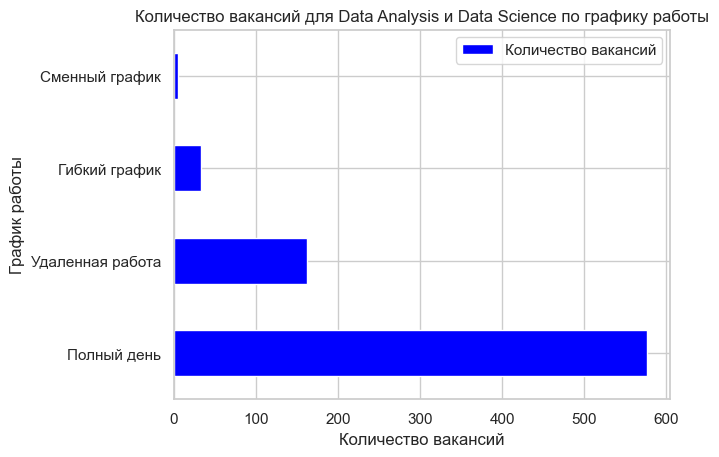

In [1559]:
# посмотрим на графике
# сделаем датафрейм
df = pd.DataFrame({'График работы': schedule_val.index, 'Количество вакансий': schedule_val.values})

# Строим столбчатый график
df.plot.barh(x='График работы', y='Количество вакансий', color='blue')

# Настраиваем метки
plt.xlabel('Количество вакансий')
plt.ylabel('График работы')
plt.title('Количество вакансий для Data Analysis и Data Science по графику работы')

# Показываем график
plt.show()

Из графика наглядно видно, что в большинство вакансиях указан полный рабочий день, в три раза меньше специалистов ищут на удаленную работу и почти в 11 раз меньше ищут специалистов с гибким графиком работы.

### Тип занятости

In [1560]:
# посмотрим на тип занятости у дата аналитиков
employment_da = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].groupby('employment').count()
employment_da = employment_da['name'].sort_values(ascending=False)
print(employment_da)

employment
Полная занятость       252
Частичная занятость      1
Name: name, dtype: int64


In [1561]:
# посмотрим на тип занятости у дата сайентистов
employment_ds = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].groupby('employment').count()
employment_ds = employment_ds['name'].sort_values(ascending=False)
print(employment_ds)

employment
Полная занятость       508
Стажировка              12
Проектная работа         2
Частичная занятость      1
Name: name, dtype: int64


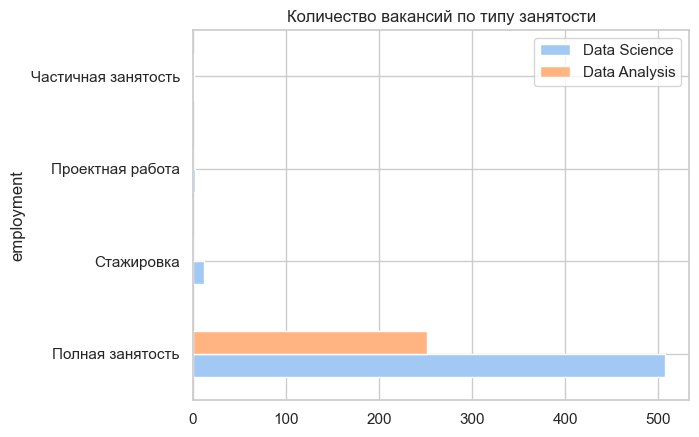

In [1562]:
# посмотрим на диаграмме тип занятости специалистов в вакансиях
# сделаем новый датафрейм
combined_df = pd.concat([employment_ds, employment_da], axis=1)
combined_df.columns = ['Data Science', 'Data Analysis']
ax = combined_df.plot.barh(sharex=True, title='Количество вакансий по типу занятости')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

# Покажите график
plt.show()

Как видно из графика, за анализируемый период в вакансиях ищут и дата аналитиков, и дата сайентистов на полную занятость, вакансии на стажировку есть у дата сайентистов, проектная работа и частичная занятость встречается в 1-2 вакансии всего.

**Вывод:**

- По топу работодателей выбивается Сбер, он ищет и дата аналитиков, и дата сайентистов на разные грейды. По остальным же компаниям можно сделать вывод, что дата сайентисты разных грейдов более требуемые в вакансиях, чем дата аналитики.  
- В большинстве вакансий работодатели не хотят указывать размер зарплаты, скорее всего он озвучивается уже после собеседования с кандидатом.
- По графику работы можем сделать вывод, что большинство специалистов ищут на полный рабочий день, в 3 раза меньше на удаленку. 
- По типу занятости тоже ищут на полную занятость, проектной и частичной работы почти нет, и очень мало вакансий для стажировки для дата сайентистов, а стажировки для дата аналитиков вообще нет, что очень огорчает.

## Расчет понедельной динамики количества вакансий для Аналитика данных и специалиста по Data Science.

In [1563]:
# создадим столбец с неделей публикации вакансии для дата сайентистов
vacancies_da_ds.loc[vacancies_da_ds.name_type == 'ds', 'week'] = vacancies_da_ds.loc[vacancies_da_ds.name_type == 'ds', 'published_at'].dt.isocalendar().week
vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date,skills_from_key_skills,skills_from_description,skills,week
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",...,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN,ds,2024-04-02,"разработка поисковых технологий, it, data scie...","airflow, clickhouse, hadoop, python, nlp","разработка поисковых технологий, airflow, it, ...",14
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",...,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN,ds,2024-04-27,"оценка рисков, ad, кредитные риски, статистиче...","sql, python, статистический анализ","оценка рисков, кредитные риски, статистический...",17
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",...,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN,ds,2024-04-08,"юнит-экономика, public speaking, research, dat...",,"юнит-экономика, public speaking, research, dat...",15
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ds,2024-04-08,"юнит-экономика, public speaking, research, dat...",,"юнит-экономика, public speaking, research, dat...",15
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ds,2024-04-08,"юнит-экономика, public speaking, research, dat...",,"юнит-экономика, public speaking, research, dat...",15


In [1564]:
# сделаем группировку
week_ds = vacancies_da_ds[vacancies_da_ds.name_type == 'ds'].groupby('week').count()
week_ds = week_ds['name']
print(week_ds)

week
9       1
10     25
11     38
12     46
13     62
14     61
15     66
16     82
17    127
18     15
Name: name, dtype: int64


In [1565]:
# посмотрим на графике
fig = px.bar(week_ds,
             title='Количество вакансий по неделям для Data Scientist', x='name',
             labels={'name':'Количество вакансий', 'week':'Неделя'}, height=400, width=700)
fig.show()

In [1566]:
# посмотрим на данные с разбивкой по грейдам
week_ds = pd.pivot_table(vacancies_da_ds, columns='week', index='experience', values='name', aggfunc='count')
week_ds

week,9,10,11,12,13,14,15,16,17,18
experience,,,,,,,,,,
Junior (no experince),NaN,1.00,4.00,4.00,3.00,NaN,1.00,4.00,6.00,NaN
Junior+ (1-3 years),NaN,8.00,15.00,23.00,29.00,24.00,35.00,32.00,50.00,8.00
Middle (3-6 years),NaN,15.00,18.00,17.00,28.00,35.00,29.00,43.00,65.00,6.00
Senior (6+ years),1.00,1.00,1.00,2.00,2.00,2.00,1.00,3.00,6.00,1.00


In [1567]:
# посмотрим на диаграмме
fig = px.bar(week_ds,
             title='Количество вакансий по неделям для Data Scientist по грейду',
             labels={'experience':'Опыт работы', 'value':'Количество вакансий'}, height=400, width=700)
fig.show()

In [1568]:
# создадим столбец с неделей публикации вакансии для дата аналитиков
vacancies_da_ds.loc[vacancies_da_ds.name_type == 'da', 'week'] = vacancies_da_ds.loc[vacancies_da_ds.name_type == 'da', 'published_at'].dt.isocalendar().week
vacancies_da_ds[vacancies_da_ds.name_type == 'da'].head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date,skills_from_key_skills,skills_from_description,skills,week
5,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",...,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN,da,2024-04-09,"pandas, bi, git, http, математическая статисти...","pandas, git, clickhouse, python, numpy, linux,...","pandas, bi, git, http, математическая статисти...",15
7,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",...,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,da,2024-04-08,"витрины данных, teradata, airflow, greenplum, ...","sql, big data, etl, документация","витрины данных, big data, teradata, airflow, g...",15
8,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",...,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,da,2024-04-08,"витрины данных, teradata, airflow, greenplum, ...","sql, big data, etl, документация","витрины данных, big data, teradata, airflow, g...",15
10,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",...,ЗП не указана,Анализ данных,Pandas,NaN,da,2024-04-27,"анализ данных, pandas","numpy, python, прогнозирование, pandas","прогнозирование, pandas, numpy, python, анализ...",17
14,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",...,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN,da,2024-04-02,"a/b тесты, sql, python, confluence","airflow, confluence, clickhouse, numpy, python...","airflow, confluence, a/b тесты, clickhouse, nu...",14


In [1569]:
# сделаем группировку
week_da = vacancies_da_ds[vacancies_da_ds.name_type == 'da'].groupby('week').count()
week_da = week_da['name']
print(week_da)

week
10     3
11    12
12    22
13    21
14    31
15    36
16    53
17    61
18    14
Name: name, dtype: int64


In [1570]:
# посмотрим на графике
fig = px.bar(week_da,
             title='Количество вакансий по неделям для Data Ananlysis', x='name',
             labels={'name':'Количество вакансий', 'week':'Неделя'}, height=400, width=700)
fig.show()

In [1571]:
# посмотрим на данные с разбивкой по грейдам
week_da = pd.pivot_table(vacancies_da_ds[vacancies_da_ds.name_type == 'da'], columns='week', index='experience', values='name', aggfunc='count')
week_da

week,10,11,12,13,14,15,16,17,18
experience,,,,,,,,,
Junior (no experince),NaN,NaN,1.00,NaN,1.00,1.00,NaN,2.00,2.00
Junior+ (1-3 years),3.00,6.00,11.00,9.00,15.00,22.00,36.00,34.00,7.00
Middle (3-6 years),NaN,6.00,10.00,12.00,15.00,13.00,17.00,23.00,4.00
Senior (6+ years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00


In [1572]:
# посмотрим на диаграмме
fig = px.bar(week_da,
             title='Количество вакансий по неделям для Data Analisys по грейду',
             labels={'experience':'Опыт работы', 'value':'Количество вакансий'}, height=400, width=700)
fig.show()

На двух графиках по количеству вакансий для дата аналитиков и дата сайентистов видно, что самый пик пришелся на 17 неделю, а рост начался с 12 неделе. Возможно, произошло из-за того, что на 10 неделе были праздничные дни, сотрудники не работали и соответственно не могли разместить вакансию, а начиная с 12 неделе пошел рост вакансий и после 17 неделе перед праздниками достаточно резко спал. Если же посмотреть на графики по грейдам, то больше всего опубликовали вакансий для джуниоров+ и миддлов дата аналитиков и дата сайентистов на 15, 16, 17 неделях. 

## Выводы

К нам обратились за исследованием базы вакансий на hh.ru для Аналитиков данных и Дата сайентистов за период с 29 февраля по 30 апреля 2024 года. Нужно было выявить различия в предлагаемых вакансиях.

Сделали преобработку данных, где объединили две выборки в одну, чтобы было удобнее с ней работать.

Провели исследовательский анализ, из которого можем сделать выводы:
- большинство вакансий представлено для дата сайентистов даже на позиции джуниоров без опыта;
- больше всего вакансий размещено в Москве, так как именно в этом городе - центре развития различных отраслей бизнеса, требуется достаточное количество специалистов;
- в анализе по **ключевым навыкам** выявили:
  - для DA на 1-ом месте стоит стоит SQL, на 2-ом Python, на 3-ем Pandas. Не зависимо от грейда эти ключевые навыка остаются на первых местах по количеству упоминаний в вакансиях;
  - для DS на 1-ом месте Python, на 2-ом Pandas, на 3-ем SQL. Но если сделать сортировку по грейдам, то у джунов без опыта в ключевых навыках требуется питон, документация и confluence. На старших грейдах (джуниор+, миддл) возвращаются привычные нам ключевые скиллы - питон, пандас и SQL, а у синьеров вместо SQL - ML;
  - для дата аналитиков чаще требуется SQL, а для дата сайентистов Python.
- по анализу **хард скиллов**, можно сказать:
  - для специалистов DA и DS чаще всего указывают Pandas, confluence, Юнит экономику.
- по **софт скиллам**, сделаем вывод:
  - не зависимо от специалиста, первые три места занимают: документация, коммуникация и аналитическое мышление;
  - софт скиллы больше требуются у дата сайентистов;
  - для Аналитиков данных чаще упоминаются скиллы: переговоры и решение проблем, а для Дата сайентистов: креативность и презентация результатов.
- среди работодателей выделяется Сбер, у него огромное количество вакансий для разных грейдов DS и DA. Дата сайентистов ищут чаще, чем дата аналитиков. Больше всего вакансий у работодателей на грейды джун+ и миддл;
- заработная плата не указывается в 92% всех вакансий за период с марта по апрель (включительно);
- почти во всех вакансиях ищут специалистов на полный рабочий день, 1/3 работодателей рассматривает удаленку;
- почти все работодатели ищут специалистов на полную занятость, и только у дата сайентистов есть небольшая возможность найти стажировку;
- самый пик по размещению вакансий для DA и DS пришелся на 17 неделю (последняя неделя апреля), возможно так специально сделали hr-специалисты компаний перед праздничными выходными, так как многие будут свободны и могут посмотреть новые вакансии работы в приложении или на сайте.

## Презентация

Ссылка на презентацию: https://docs.google.com/presentation/d/1-GFQW_2z4WzU9GJvryPi3sPi-B145Z4ApBBEs1y-HK8/edit?usp=sharing